In [ ]:
import pandas as pd

# File path to dataset
file_path = "/content/Expanded_Hypertension_Dataset.xlsx"

# Load the dataset
df = pd.read_excel(file_path)

# Display column names
print(df.columns)


Index(['Age', 'Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
       'Systolic BP', 'Diastolic BP', 'Elevated Creatinine',
       'Diabetes Mellitus', 'Family History of CVD', 'Elevated Cholesterol',
       'Smoking', 'LVH', 'IHD', 'CVD', 'Retinopathy', 'Treatment',
       'Control Status', 'Physical Activity', 'Dietary Habits'],
      dtype='object')


#Subgroup Analysis by Treatment Type

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Expanded_Hypertension_Dataset.xlsx"
df = pd.read_excel(file_path)

# Ensure proper column types
df = df.convert_dtypes()  # Automatically assigns appropriate types based on column content

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=["int", "float"]).columns
categorical_cols = df.select_dtypes(include=["string", "category"]).columns

# Group by the "Treatment" column
grouped = df.groupby("Treatment")

# Numerical summary (mean of numerical columns)
numerical_summary = grouped[numerical_cols].mean()

# Categorical summary (value counts of categorical columns)
categorical_summary = {}
for column in categorical_cols:
    if column != "Treatment":  # Skip the grouping column
        categorical_summary[column] = grouped[column].value_counts()

# Display results
print("Numerical Summary by Treatment:")
print(numerical_summary)

print("\nCategorical Summary by Treatment:")
for key, value in categorical_summary.items():
    print(f"\n{key}:\n{value}")

Numerical Summary by Treatment:
                         Age  Systolic BP  Diastolic BP
Treatment                                              
Combination Drugs  49.003673   139.631748     89.684627
Single Drug        48.381775   139.168563     89.661878

Categorical Summary by Treatment:

Sex:
Treatment          Sex   
Combination Drugs  Male      42410
                   Female    32460
Single Drug        Male      14390
                   Female    10740
Name: count, dtype: int64

Education:
Treatment          Education       
Combination Drugs  Primary             26880
                   Secondary           16880
                   Graduate             9810
                   Higher Secondary     9210
                   Post-Graduate        6570
                   No education         5050
                   Madrasa               470
Single Drug        Primary              9040
                   Secondary            5600
                   Graduate             3270
             

In [ ]:
# Reloading necessary libraries and dataset after reset
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Define the file path
file_path = "/content/Expanded_Hypertension_Dataset.xlsx"

# Load the dataset
data = pd.read_excel(file_path)

# Display column names
data.columns.tolist()

['Age',
 'Sex',
 'Education',
 'Occupation',
 'Monthly Income',
 'Residence',
 'Systolic BP',
 'Diastolic BP',
 'Elevated Creatinine',
 'Diabetes Mellitus',
 'Family History of CVD',
 'Elevated Cholesterol',
 'Smoking',
 'LVH',
 'IHD',
 'CVD',
 'Retinopathy',
 'Treatment',
 'Control Status',
 'Physical Activity',
 'Dietary Habits']

In [ ]:
!pip install ace_tools

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Creating the coefficients DataFrame
coefficients = pd.DataFrame({
    'Variable': logit_model.params.index,
    'Coefficient': logit_model.params.values,
    'Odds Ratio': np.exp(logit_model.params.values),
    'P-Value': logit_model.pvalues.values
})

# Round values for better readability
coefficients['Odds Ratio'] = coefficients['Odds Ratio'].round(3)
coefficients['P-Value'] = coefficients['P-Value'].round(4)
coefficients['Coefficient'] = coefficients['Coefficient'].round(4)

# Display the results in a table
print(tabulate(coefficients, headers='keys', tablefmt='grid'))



+----+-------------------------------+---------------+--------------+-----------+
|    | Variable                      |   Coefficient |   Odds Ratio |   P-Value |
+====+===============================+===============+==============+===========+
|  0 | Intercept                     |       -0.5829 |        0.558 |    0      |
+----+-------------------------------+---------------+--------------+-----------+
|  1 | Sex[T.Male]                   |        0.0027 |        1.003 |    0.8491 |
+----+-------------------------------+---------------+--------------+-----------+
|  2 | Education[T.Higher Secondary] |       -0.1505 |        0.86  |    0      |
+----+-------------------------------+---------------+--------------+-----------+
|  3 | Education[T.Madrasa]          |        0.2542 |        1.289 |    0.0021 |
+----+-------------------------------+---------------+--------------+-----------+
|  4 | Education[T.No education]     |       -0.0933 |        0.911 |    0.0049 |
+----+----------

In [ ]:
!pip install ace_tools

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit
import numpy as np
from tabulate import tabulate  # For pretty-printing tables
from IPython.display import display  # For displaying DataFrames in Jupyter

# Load the dataset
file_path = "/content/Expanded_Hypertension_Dataset.xlsx"
data = pd.read_excel(file_path)

# Ensure column names are clean and valid Python identifiers
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('-', '_').str.replace('<', 'lt').str.replace('>', 'gt')

# Recode 'Control Status' to binary (Controlled = 1, Uncontrolled = 0)
data['Control_Status'] = data['Control_Status'].apply(
    lambda x: 1 if str(x).strip().lower() == 'controlled' else 0
)

# Select relevant variables
selected_vars = [
    'Age', 'Sex', 'Education', 'Occupation', 'Monthly_Income', 'Residence',
    'Systolic_BP', 'Diastolic_BP', 'Elevated_Creatinine', 'Diabetes_Mellitus',
    'Family_History_of_CVD', 'Elevated_Cholesterol', 'Smoking', 'LVH', 'IHD',
    'CVD', 'Retinopathy', 'Physical_Activity', 'Dietary_Habits', 'Control_Status'
]
data = data[selected_vars]

# Handle missing values
data = data.dropna()

# Convert categorical variables to appropriate types
categorical_vars = ['Sex', 'Education', 'Occupation', 'Monthly_Income', 'Residence',
                    'Elevated_Creatinine', 'Diabetes_Mellitus', 'Family_History_of_CVD',
                    'Elevated_Cholesterol', 'Smoking', 'LVH', 'IHD', 'CVD', 'Retinopathy',
                    'Physical_Activity', 'Dietary_Habits']

data[categorical_vars] = data[categorical_vars].apply(lambda x: x.astype('category'))

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Ensure encoded column names are valid Python identifiers
data_encoded.columns = data_encoded.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('<', 'lt').str.replace('>', 'gt')

# Logistic Regression Formula
independent_vars = " + ".join([col for col in data_encoded.columns if col != 'Control_Status'])
formula = f"Control_Status ~ {independent_vars}"

# Fit the logistic regression model
logit_model = logit(formula, data=data_encoded).fit()

# Print summary
print(logit_model.summary())

# Extract regression results into a DataFrame
coefficients = pd.DataFrame({
    'Variable': logit_model.params.index,
    'Coefficient': logit_model.params.values,
    'Odds Ratio': np.exp(logit_model.params.values),  # Use exp(coefficient) for odds ratios
    'P-Value': logit_model.pvalues.values
}).reset_index(drop=True)

# Pretty print the regression results
print(tabulate(coefficients, headers="keys", tablefmt="grid"))

# Display the DataFrame using pandas' built-in display function
display(coefficients)

Optimization terminated successfully.
         Current function value: 0.587956
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Control_Status   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99968
Method:                           MLE   Df Model:                           31
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                0.003143
Time:                        13:12:04   Log-Likelihood:                -58796.
converged:                       True   LL-Null:                       -58981.
Covariance Type:            nonrobust   LLR p-value:                 7.642e-60
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.5829      0.101    

Variable  Coefficient  Odds Ratio       P-Value
0                            Intercept    -0.582895    0.558280  7.308388e-09
1                     Sex_Male[T.True]     0.002728    1.002731  8.490869e-01
2   Education_Higher_Secondary[T.True]    -0.150454    0.860318  7.276958e-08
3            Education_Madrasa[T.True]     0.254233    1.289473  2.128964e-03
4       Education_No_education[T.True]    -0.093331    0.910892  4.915297e-03
5      Education_Post_Graduate[T.True]    -0.161373    0.850975  2.029529e-07
6            Education_Primary[T.True]    -0.084953    0.918555  1.592434e-04
7          Education_Secondary[T.True]    -0.170185    0.843508  3.365278e-12
8          Occupation_Business[T.True]     0.067669    1.070011  1.118612e-02
9         Occupation_Housewife[T.True]     0.017506    1.017660  4.418148e-01
10          Occupation_Retired[T.True]     0.142108    1.152702  1.406014e-05
11          Occupation_Service[T.True]    -0.127036    0.880702  5.155357e-07
12       Occupation_Unemployed[T.True]    -0.064905    0.937157  2.225747e-01
13   Monthly_Income_5001_10000[T.True]    -0.055905    0.945629  9.408434e-03
14       Monthly_Income_lt5000[T.True]    -0.050821    0.950449  1.450695e-02
15      Monthly_Income_gt15000[T.True]    -0.084342    0.919117  1.480138e-03
16         Residence_Sub_urban[T.True]     0.096905    1.101756  2.709218e-07
17             Residence_Urban[T.True]     0.114984    1.121856  1.306534e-12
18     Elevated_Creatinine_Yes[T.True]    -0.032659    0.967869  1.354526e-01
19       Diabetes_Mellitus_Yes[T.True]    -0.071829    0.930690  6.302661e-03
20   Family_History_of_CVD_Yes[T.True]     0.031805    1.032316  6.601934e-02
21    Elevated_Cholesterol_Yes[T.True]     0.160816    1.174469  9.616413e-10
22                 Smoking_Yes[T.True]     0.036419    1.037090  6.457373e-02
23                     LVH_Yes[T.True]     0.120713    1.128301  1.279424e-04
24                     IHD_Yes[T.True]    -0.055365    0.946140  4.371140e-03
25                     CVD_Yes[T.True]     0.035967    1.036621  1.476178e-01
26             Retinopathy_Yes[T.True]     0.075086    1.077977  7.311684e-02
27       Physical_Activity_Yes[T.True]     0.007481    1.007510  6.287176e-01
28    Dietary_Habits_Unhealthy[T.True]     0.012575    1.012654  3.841318e-01
29                                 Age     0.001052    1.001052  5.279646e-02
30                         Systolic_BP    -0.001919    0.998083  3.162371e-05
31                        Diastolic_BP    -0.001388    0.998613  4.177499e-02

In [ ]:
# Create a DataFrame with the regression results
coefficients = pd.DataFrame({
    'Variable': logit_model.params.index,
    'Coefficient': logit_model.params.values,
    'Odds Ratio': np.exp(logit_model.params.values),
    'P-Value': logit_model.pvalues.values
})

# Convert the DataFrame to a LaTeX table
latex_table = coefficients.to_latex(
    index=False,  # Do not include row indices
    column_format='lrrr',  # Left-align the first column, right-align the rest
    float_format="%.6f",  # Format floating-point numbers to 6 decimal places
    caption="Logistic Regression Results: Socioeconomic Status and Hypertension Control",
    label="tab:regression_results"
)

# Print the LaTeX table
print(latex_table)

\begin{table}
\caption{Logistic Regression Results: Socioeconomic Status and Hypertension Control}
\label{tab:regression_results}
\begin{tabular}{lrrr}
\toprule
Variable & Coefficient & Odds Ratio & P-Value \\
\midrule
Intercept & -0.582895 & 0.558280 & 0.000000 \\
Sex_Male[T.True] & 0.002728 & 1.002731 & 0.849087 \\
Education_Higher_Secondary[T.True] & -0.150454 & 0.860318 & 0.000000 \\
Education_Madrasa[T.True] & 0.254233 & 1.289473 & 0.002129 \\
Education_No_education[T.True] & -0.093331 & 0.910892 & 0.004915 \\
Education_Post_Graduate[T.True] & -0.161373 & 0.850975 & 0.000000 \\
Education_Primary[T.True] & -0.084953 & 0.918555 & 0.000159 \\
Education_Secondary[T.True] & -0.170185 & 0.843508 & 0.000000 \\
Occupation_Business[T.True] & 0.067669 & 1.070011 & 0.011186 \\
Occupation_Housewife[T.True] & 0.017506 & 1.017660 & 0.441815 \\
Occupation_Retired[T.True] & 0.142108 & 1.152702 & 0.000014 \\
Occupation_Service[T.True] & -0.127036 & 0.880702 & 0.000001 \\
Occupation_Unemployed[T.Tr

In [ ]:
print(data.columns)

Index(['Age', 'Sex', 'Education', 'Occupation', 'Monthly_Income', 'Residence',
       'Systolic_BP', 'Diastolic_BP', 'Elevated_Creatinine',
       'Diabetes_Mellitus', 'Family_History_of_CVD', 'Elevated_Cholesterol',
       'Smoking', 'LVH', 'IHD', 'CVD', 'Retinopathy', 'Physical_Activity',
       'Dietary_Habits', 'Control_Status'],
      dtype='object')


In [ ]:
# Handle missing values
print("Missing Values Before Handling:")
print(data.isnull().sum())

# Fill numeric columns with median
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill non-numeric columns with mode
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
data[non_numeric_cols] = data[non_numeric_cols].fillna(data[non_numeric_cols].mode().iloc[0])

# Drop rows with missing values (if any remain)
data = data.dropna()

print("Missing Values After Handling:")
print(data.isnull().sum())

Missing Values Before Handling:
Age                      0
Sex                      0
Education                0
Occupation               0
Monthly_Income           0
Residence                0
Systolic_BP              0
Diastolic_BP             0
Elevated_Creatinine      0
Diabetes_Mellitus        0
Family_History_of_CVD    0
Elevated_Cholesterol     0
Smoking                  0
LVH                      0
IHD                      0
CVD                      0
Retinopathy              0
Physical_Activity        0
Dietary_Habits           0
Control_Status           0
dtype: int64
Missing Values After Handling:
Age                      0
Sex                      0
Education                0
Occupation               0
Monthly_Income           0
Residence                0
Systolic_BP              0
Diastolic_BP             0
Elevated_Creatinine      0
Diabetes_Mellitus        0
Family_History_of_CVD    0
Elevated_Cholesterol     0
Smoking                  0
LVH                      0
IHD   

In [ ]:
# Load the dataset
file_path = "/content/Expanded_Hypertension_Dataset.xlsx"
data = pd.read_excel(file_path)

# Check for missing values (optional, just for confirmation)
print("Missing Values:")
print(data.isnull().sum())

# Encode non-numeric columns
label_encoders = {}
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Define target and features
target = "Control Status"
features = [
    "Age", "Systolic BP", "Diastolic BP", "Treatment", "Sex_Male",
    "Education_Higher Secondary", "Education_Madrasa", "Education_No education",
    "Education_Post-Graduate", "Education_Primary", "Education_Secondary",
    "Occupation_Business", "Occupation_Housewife", "Occupation_Retired",
    "Occupation_Service", "Occupation_Unemployed", "Monthly Income_5001-10000",
    "Monthly Income_<5000", "Monthly Income_>15000", "Residence_Sub-urban",
    "Residence_Urban", "Elevated Creatinine_Yes", "Diabetes Mellitus_Yes",
    "Family History of CVD_Yes", "Elevated Cholesterol_Yes", "Smoking_Yes",
    "LVH_Yes", "IHD_Yes", "CVD_Yes", "Retinopathy_Yes",
    "Physical Activity_Yes", "Dietary Habits_Unhealthy"
]

# Ensure features exist in the dataset
features = [col for col in features if col in data.columns]

# Prepare the data
X = data[features]
y = data[target]

# Standardize numerical columns
scaler = StandardScaler()
numerical_cols = ["Age", "Systolic BP", "Diastolic BP"]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}
grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring="roc_auc")
grid_search.fit(X_train_res, y_train_res)
print("Best Parameters:", grid_search.best_params_)
model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
print(f"Cross-Validation ROC AUC: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# AUC/ROC Analysis
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.savefig("roc_curve.png")
plt.show()

# Sensitivity Analysis (Recall, Precision)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

# Plot Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall_vals, precision_vals)
plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.savefig("precision_recall_curve.png")
plt.show()

# Full Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Missing Values:
Age                      0
Sex                      0
Education                0
Occupation               0
Monthly Income           0
Residence                0
Systolic BP              0
Diastolic BP             0
Elevated Creatinine      0
Diabetes Mellitus        0
Family History of CVD    0
Elevated Cholesterol     0
Smoking                  0
LVH                      0
IHD                      0
CVD                      0
Retinopathy              0
Treatment                0
Control Status           0
Physical Activity        0
Dietary Habits           0
dtype: int64


<ipython-input-13-4b806b8baf22>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


NameError: name 'SMOTE' is not defined

In [ ]:
pip install shap lime

In [ ]:
df = pd.read_excel('/content/Expanded_Hypertension_Dataset.xlsx')

In [ ]:
df.columns

Index(['Age', 'Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
       'Systolic BP', 'Diastolic BP', 'Elevated Creatinine',
       'Diabetes Mellitus', 'Family History of CVD', 'Elevated Cholesterol',
       'Smoking', 'LVH', 'IHD', 'CVD', 'Retinopathy', 'Treatment',
       'Control Status', 'Physical Activity', 'Dietary Habits'],
      dtype='object')

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=16f3690f43999cbfd37a2bd2a544137afd6a1d71ee9637fd1016a3a3772a1d1c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
pip install shap pdpbox eli5 scikit-learn pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn shap pdpbox openpyxl

In [ ]:
!pip install shap pdpbox scikit-learn pandas numpy matplotlib seaborn openpyxl

Starting Hypertension Analysis Pipeline...
Dataset loaded successfully. Shape: (100000, 21)

Unique values in Treatment column:
['Combination Drugs' 'Single Drug']

Unique values in Monthly Income:
['>15000' '<5000' '5001-10000' '10001-15000']

Performing Initial Data Exploration...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Age                    100000 non-null  int64 
 1   Sex                    100000 non-null  object
 2   Education              100000 non-null  object
 3   Occupation             100000 non-null  object
 4   Monthly Income         100000 non-null  object
 5   Residence              100000 non-null  object
 6   Systolic BP            100000 non-null  int64 
 7   Diastolic BP           100000 non-null  int64 
 8   Elevated Creatinine    100000 non-null  object
 9   Diabetes Melli

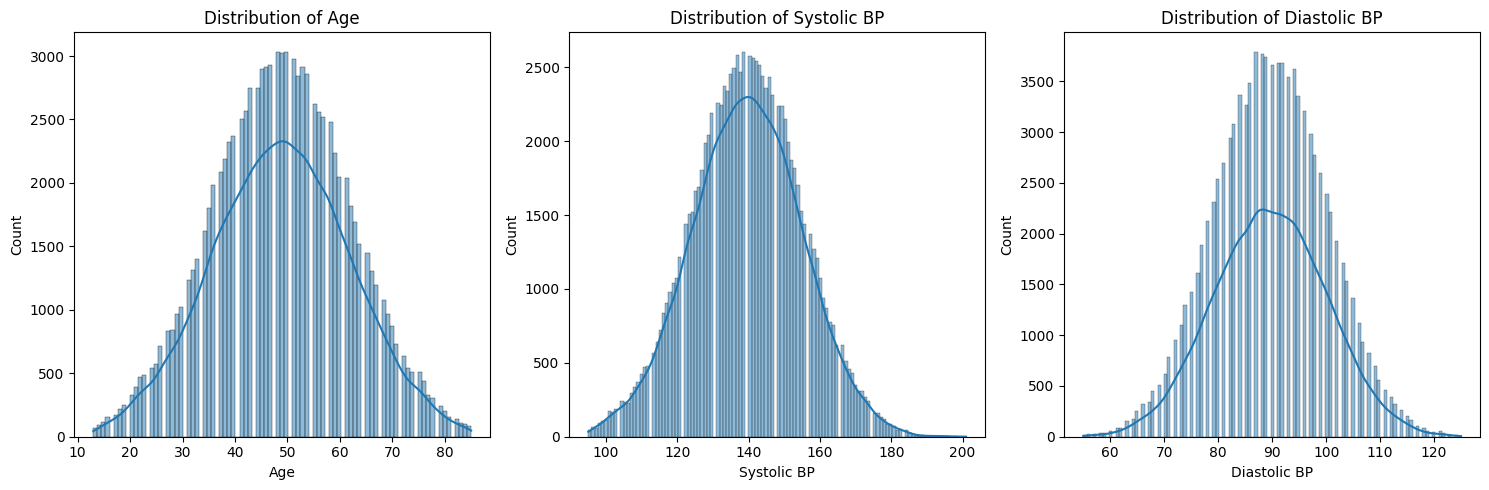


Preprocessing Data...
Starting data preprocessing...
Encoding categorical variables...
Successfully encoded Sex
Successfully encoded Education
Successfully encoded Occupation
Successfully encoded Residence
Successfully encoded Dietary Habits
Successfully encoded Control Status
Successfully encoded Treatment
Successfully encoded Monthly Income
Scaling numerical variables...
Successfully scaled numerical variables
Converting binary columns...
Successfully converted binary columns
Preparing features and target...
Successfully prepared features and target
Preprocessing completed successfully!

Training and Evaluating Model...
Training Random Forest model...

Cross-validation scores: [0.911875  0.9120625 0.9120625 0.9119375 0.911875 ]
Mean CV score: 0.9119624999999999

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18234
           1       1.00      0.00      0.00      1766

    accuracy                         

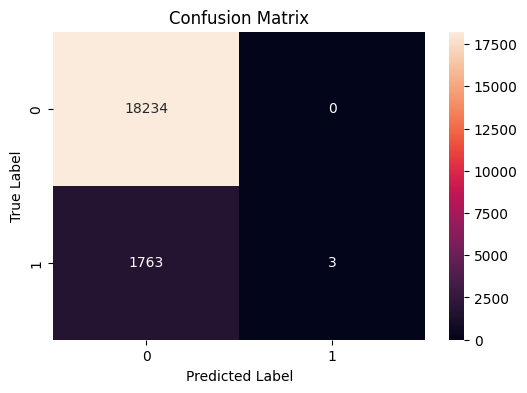

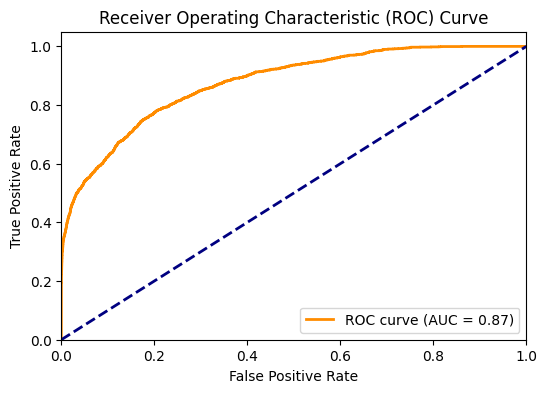


Analyzing Feature Importance...


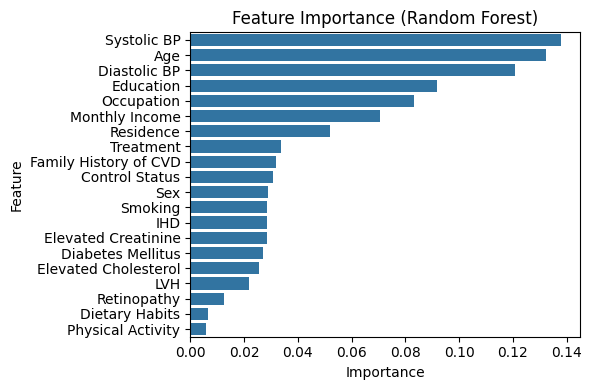


Generating SHAP Analysis...


<Figure size 600x400 with 0 Axes>

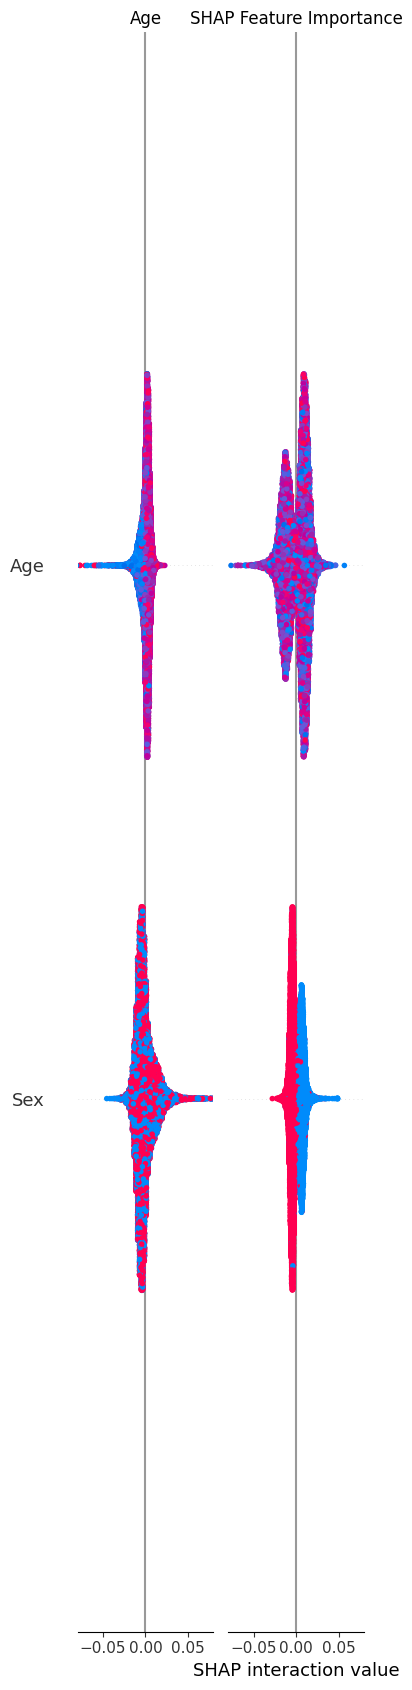

<Figure size 600x400 with 0 Axes>

In [ ]:


# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import shap
from sklearn.inspection import PartialDependenceDisplay
import warnings
warnings.filterwarnings('ignore')

# Define the HypertensionAnalysis class
class HypertensionAnalysis:
    def __init__(self):
        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.feature_names = None
        self.label_encoders = {}
        self.scaler = None

    def load_data(self, file_path):
        """Load and prepare the dataset"""
        try:
            self.df = pd.read_excel(file_path)
            print(f"Dataset loaded successfully. Shape: {self.df.shape}")
            print("\nUnique values in Treatment column:")
            print(self.df['Treatment'].unique())
            print("\nUnique values in Monthly Income:")
            print(self.df['Monthly Income'].unique())
            return self.df
        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return None

    def explore_data(self):
        """Perform initial data exploration"""
        print("\nDataset Info:")
        print(self.df.info())

        print("\nMissing Values:")
        print(self.df.isnull().sum())

        # Display categorical distributions
        categorical_cols = ['Sex', 'Education', 'Occupation', 'Residence',
                          'Dietary Habits', 'Control Status', 'Treatment']
        for col in categorical_cols:
            print(f"\nDistribution of {col}:")
            print(self.df[col].value_counts())

        # Display distributions of key features
        numeric_cols = ['Age', 'Systolic BP', 'Diastolic BP']
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(1, 3, i)
            sns.histplot(self.df[col], kde=True)
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

    def preprocess_data(self):
        """Preprocess the data including encoding and scaling"""
        print("Starting data preprocessing...")
        data = self.df.copy()

        # Step 1: Handle categorical variables
        categorical_cols = [
            'Sex', 'Education', 'Occupation', 'Residence',
            'Dietary Habits', 'Control Status', 'Treatment',
            'Monthly Income'  # Added Monthly Income as categorical
        ]

        print("Encoding categorical variables...")
        for col in categorical_cols:
            try:
                le = LabelEncoder()
                data[col] = data[col].fillna('Missing')
                data[col] = le.fit_transform(data[col].astype(str))
                self.label_encoders[col] = le
                print(f"Successfully encoded {col}")
            except Exception as e:
                print(f"Error encoding {col}: {str(e)}")
                raise

        # Step 2: Scale only specific numerical variables
        numerical_cols = ['Age', 'Systolic BP', 'Diastolic BP']
        print("Scaling numerical variables...")
        try:
            self.scaler = StandardScaler()
            data[numerical_cols] = self.scaler.fit_transform(data[numerical_cols])
            print("Successfully scaled numerical variables")
        except Exception as e:
            print(f"Error scaling numerical variables: {str(e)}")
            raise

        # Step 3: Convert binary columns
        binary_cols = [
            'Elevated Creatinine', 'Diabetes Mellitus', 'Family History of CVD',
            'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD', 'Retinopathy',
            'Physical Activity'
        ]
        print("Converting binary columns...")
        try:
            for col in binary_cols:
                data[col] = data[col].map({'Yes': 1, 'No': 0})
                data[col].fillna(data[col].mode()[0], inplace=True)
            print("Successfully converted binary columns")
        except Exception as e:
            print(f"Error converting binary columns: {str(e)}")
            raise

        # Step 4: Prepare features and target
        print("Preparing features and target...")
        try:
            # Encode the target variable (CVD)
            le_target = LabelEncoder()
            self.y = le_target.fit_transform(data['CVD'].map({'Yes': 1, 'No': 0}))
            self.X = data.drop(['CVD'], axis=1)
            self.feature_names = self.X.columns.tolist()

            # Store the target encoder
            self.label_encoders['CVD'] = le_target

            # Split the data
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
            )
            print("Successfully prepared features and target")
        except Exception as e:
            print(f"Error preparing features and target: {str(e)}")
            raise

        print("Preprocessing completed successfully!")
        return self.X_train, self.X_test, self.y_train, self.y_test

    def train_model(self):
        """Train and evaluate the Random Forest model"""
        print("Training Random Forest model...")
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        )

        # Train the model
        self.model.fit(self.X_train, self.y_train)

        # Cross-validation
        cv_scores = cross_val_score(self.model, self.X_train, self.y_train, cv=5)
        print("\nCross-validation scores:", cv_scores)
        print("Mean CV score:", cv_scores.mean())

        # Evaluate on test set
        y_pred = self.model.predict(self.X_test)
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred))

        # Plot confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(self.y_test, y_pred), annot=True, fmt='d')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # ROC curve
        y_pred_proba = self.model.predict_proba(self.X_test)[:, 1]
        fpr, tpr, _ = roc_curve(self.y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

        return self.model

    def analyze_feature_importance(self):
        """Analyze and visualize feature importance"""
        importance = pd.DataFrame({
            'Feature': self.feature_names,
            'Importance': self.model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(6, 4))
        sns.barplot(x='Importance', y='Feature', data=importance)
        plt.title('Feature Importance (Random Forest)')
        plt.tight_layout()
        plt.show()

        return importance

    def generate_shap_analysis(self):
        """Generate SHAP value analysis"""
        try:
            # Create the explainer
            explainer = shap.TreeExplainer(self.model)

            # Convert X_test to DataFrame with feature names
            X_test_df = pd.DataFrame(self.X_test, columns=self.feature_names)

            # Calculate SHAP values for all observations
            shap_values = explainer.shap_values(X_test_df)

            # Create summary plot
            plt.figure(figsize=(6, 4))
            if isinstance(shap_values, list):
                # For binary classification case
                shap.summary_plot(
                    shap_values[1],  # Use positive class
                    X_test_df,
                    max_display=20,
                    show=False
                )
            else:
                # For regression case
                shap.summary_plot(
                    shap_values,
                    X_test_df,
                    max_display=20,
                    show=False
                )

            plt.title("SHAP Feature Importance")
            plt.tight_layout()
            plt.figure(figsize=(6, 4))
            plt.show()

            return explainer, shap_values

        except Exception as e:
            print(f"Error in SHAP analysis: {str(e)}")
            print("Skipping SHAP analysis...")
            return None, None

    def generate_pdp_plots(self):
        """Generate Partial Dependence Plots"""
        try:
            # Get feature importance
            importance = pd.DataFrame({
                'Feature': self.feature_names,
                'Importance': self.model.feature_importances_
            }).sort_values('Importance', ascending=False)

            # Get top 3 features
            top_features = importance['Feature'].head(6).tolist()
            print("\nAnalyzing top features:", top_features)

            # Create figure
            fig, axes = plt.subplots(1, 3, figsize=(6, 4))

            # Generate plots for each feature
            for feature, ax in zip(top_features, axes):
                feature_idx = self.feature_names.index(feature)
                print(f"Processing feature: {feature} (index: {feature_idx})")

                # Generate partial dependence plot
                display = PartialDependenceDisplay.from_estimator(
                    self.model,
                    self.X_train,
                    [feature_idx],
                    feature_names=[feature],
                    ax=ax,
                    kind='average',
                    centered=True,
                    n_jobs=-1
                )

                # Customize the plot
                ax.set_title(f'Partial Dependence Plot for {feature}')
                ax.grid(True)

                # If the feature is categorical, adjust x-axis
                if feature in ['Sex', 'Education', 'Occupation', 'Residence',
                             'Dietary Habits', 'Control Status', 'Treatment',
                             'Monthly Income']:
                    # Get original categories
                    le = self.label_encoders[feature]
                    categories = le.classes_
                    # Set x-ticks at encoded values
                    ax.set_xticks(range(len(categories)))
                    ax.set_xticklabels(categories, rotation=45, ha='right')

            plt.tight_layout()
            plt.figure(figsize=(6, 4))
            plt.show()

            # Print feature importance values
            print("\nTop feature importance values:")
            for feat in top_features:
                imp = importance[importance['Feature'] == feat]['Importance'].values[0]
                print(f"{feat}: {imp:.4f}")

        except Exception as e:
            print(f"Error generating PDP plots: {str(e)}")
            import traceback
            print(traceback.format_exc())
            print("Skipping PDP analysis...")

    def run_complete_analysis(self, file_path):
        """Run the complete analysis pipeline"""
        print("Starting Hypertension Analysis Pipeline...")

        # Load and explore data
        self.load_data(file_path)
        print("\nPerforming Initial Data Exploration...")
        self.explore_data()

        # Preprocess data
        print("\nPreprocessing Data...")
        self.preprocess_data()

        # Train and evaluate model
        print("\nTraining and Evaluating Model...")
        self.train_model()

        # Feature importance analysis
        print("\nAnalyzing Feature Importance...")
        self.analyze_feature_importance()

        # SHAP analysis
        print("\nGenerating SHAP Analysis...")
        self.generate_shap_analysis()


# Run the analysis
analyzer = HypertensionAnalysis()
analyzer.run_complete_analysis('Expanded_Hypertension_Dataset.xlsx')

In [ ]:
pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 116.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 93.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


Starting Hypertension Analysis Pipeline...
Dataset loaded successfully. Shape: (100000, 21)

Performing Initial Data Exploration...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Age                    100000 non-null  int64 
 1   Sex                    100000 non-null  object
 2   Education              100000 non-null  object
 3   Occupation             100000 non-null  object
 4   Monthly Income         100000 non-null  object
 5   Residence              100000 non-null  object
 6   Systolic BP            100000 non-null  int64 
 7   Diastolic BP           100000 non-null  int64 
 8   Elevated Creatinine    100000 non-null  object
 9   Diabetes Mellitus      100000 non-null  object
 10  Family History of CVD  100000 non-null  object
 11  Elevated Cholesterol   100000 non-null  object
 12  Smoking   

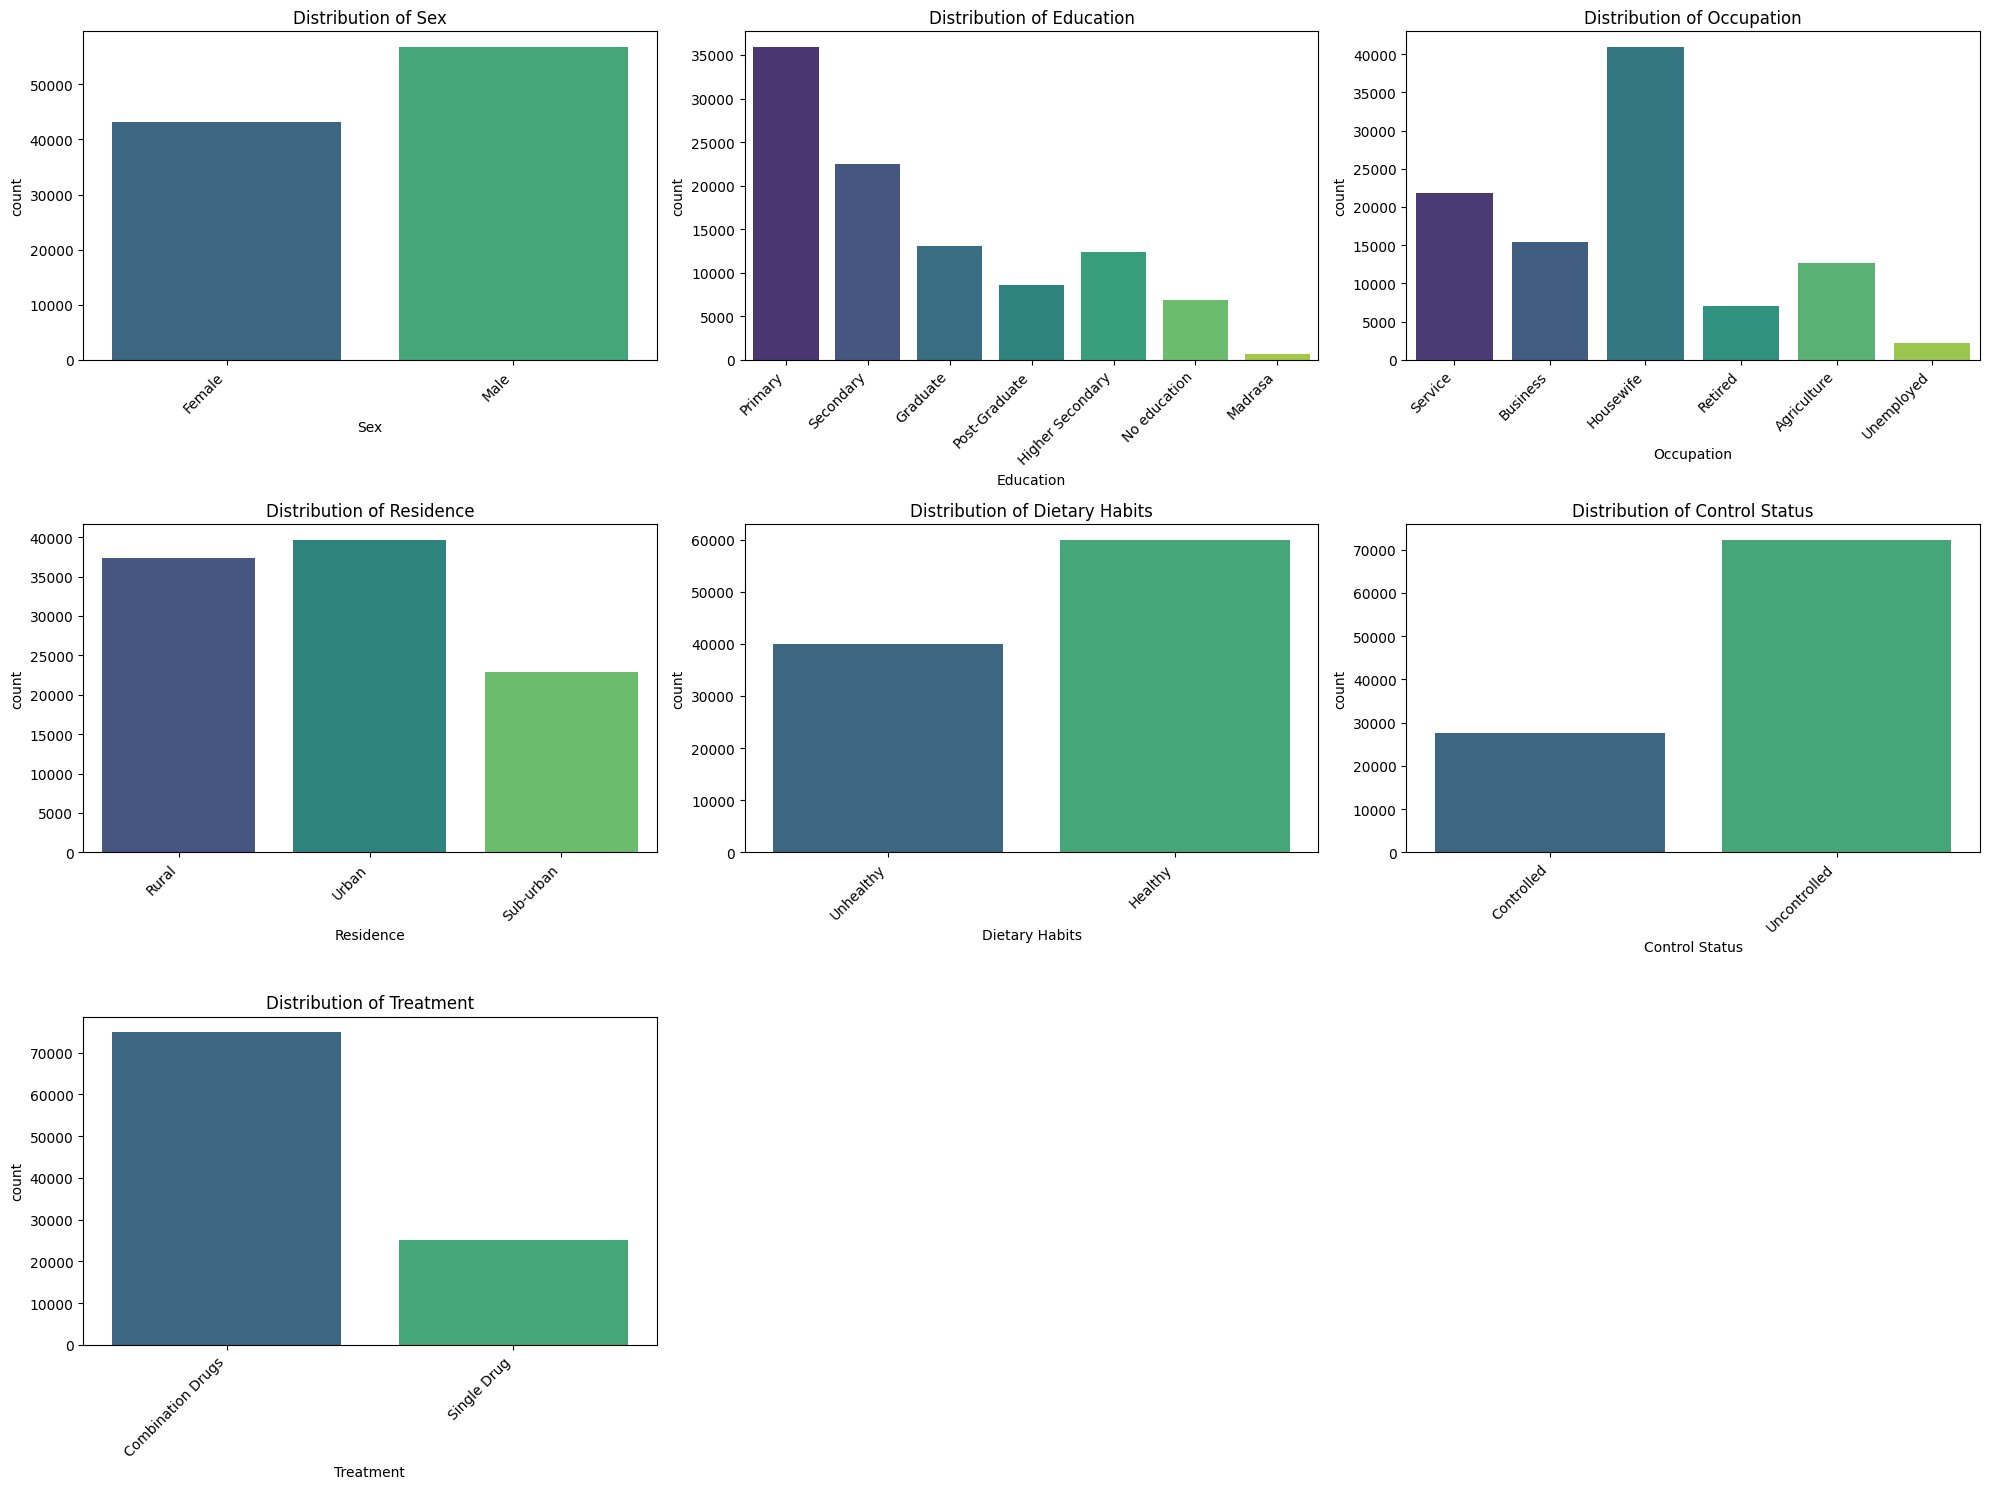

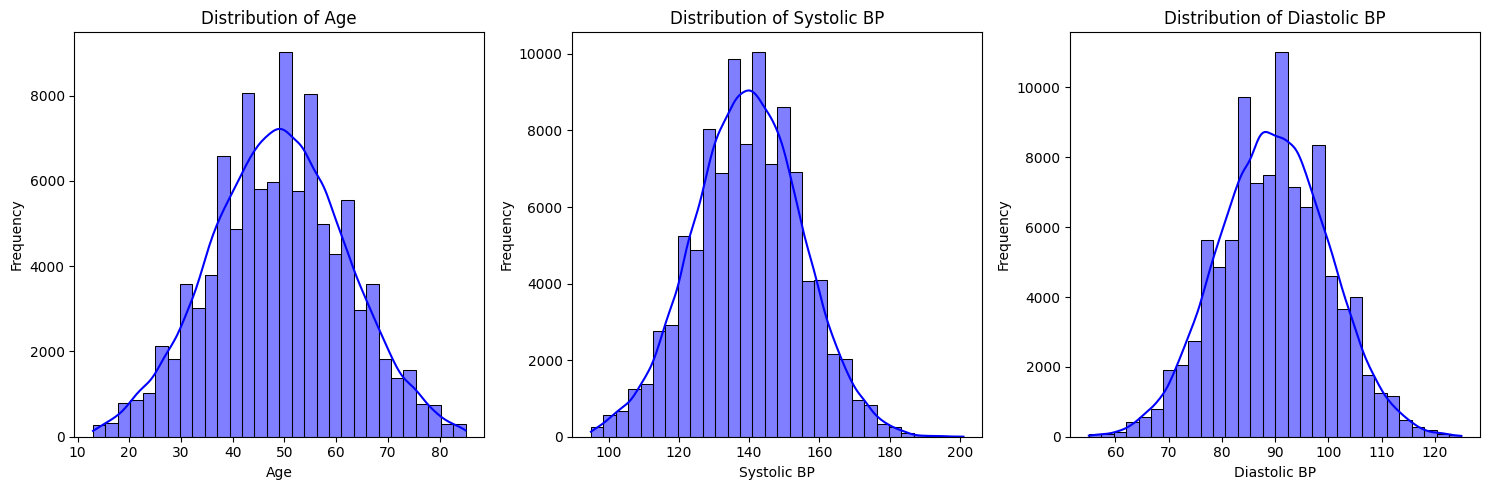


Preprocessing Data...
Starting data preprocessing...
Encoding categorical variables...
Scaling numerical variables...
Preprocessing completed successfully!

Training and Evaluating Models...

Training and Evaluating Random Forest...
Cross-validation scores (Random Forest): [0.911875 0.912125 0.912    0.912125 0.911875]
Mean CV score (Random Forest): 0.9120

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18234
           1       1.00      0.00      0.01      1766

    accuracy                           0.91     20000
   macro avg       0.96      0.50      0.48     20000
weighted avg       0.92      0.91      0.87     20000



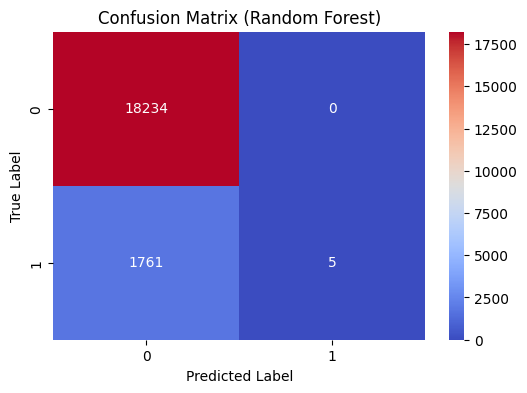


Training and Evaluating Logistic Regression...
Cross-validation scores (Logistic Regression): [0.91175   0.9116875 0.9116875 0.9116875 0.9116875]
Mean CV score (Logistic Regression): 0.9117

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18234
           1       0.00      0.00      0.00      1766

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.83      0.91      0.87     20000



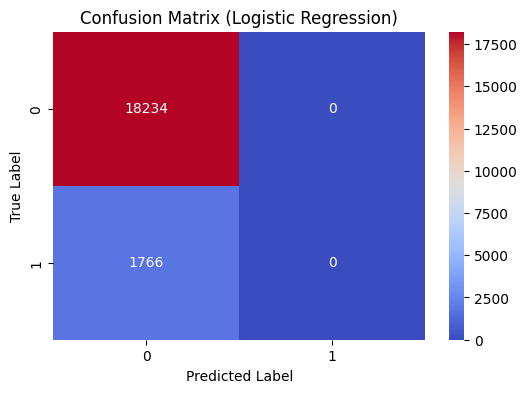


Training and Evaluating Gradient Boosting...
Cross-validation scores (Gradient Boosting): [0.91175   0.91175   0.91175   0.91175   0.9116875]
Mean CV score (Gradient Boosting): 0.9117

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18234
           1       0.75      0.00      0.00      1766

    accuracy                           0.91     20000
   macro avg       0.83      0.50      0.48     20000
weighted avg       0.90      0.91      0.87     20000



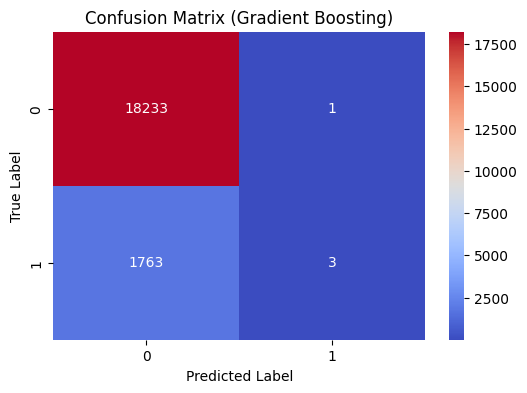


Training and Evaluating Support Vector Machine...
Cross-validation scores (Support Vector Machine): [0.91175   0.9116875 0.9116875 0.9116875 0.9116875]
Mean CV score (Support Vector Machine): 0.9117

Classification Report (Support Vector Machine):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18234
           1       0.00      0.00      0.00      1766

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.83      0.91      0.87     20000



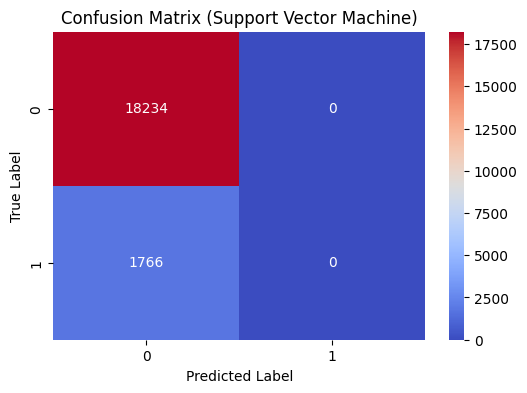


Training and Evaluating K-Nearest Neighbors...
Cross-validation scores (K-Nearest Neighbors): [0.98475   0.982875  0.9841875 0.984     0.9840625]
Mean CV score (K-Nearest Neighbors): 0.9840

Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18234
           1       0.95      0.90      0.93      1766

    accuracy                           0.99     20000
   macro avg       0.97      0.95      0.96     20000
weighted avg       0.99      0.99      0.99     20000



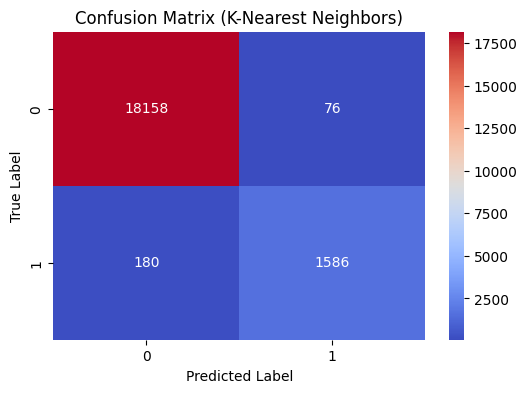


Training and Evaluating XGBoost...
Cross-validation scores (XGBoost): [0.9121875 0.91175   0.9119375 0.911875  0.912    ]
Mean CV score (XGBoost): 0.9120

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18234
           1       0.56      0.00      0.01      1766

    accuracy                           0.91     20000
   macro avg       0.73      0.50      0.48     20000
weighted avg       0.88      0.91      0.87     20000



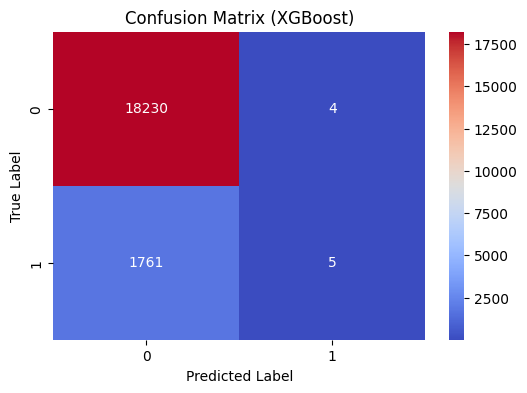

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  # Ensure XGBoost is installed
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

class HypertensionAnalysis:
    def __init__(self):
        # Existing initialization
        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}  # Dictionary to store multiple models
        self.feature_names = None
        self.label_encoders = {}
        self.scaler = None

    def load_data(self, file_path):
        """Load and prepare the dataset"""
        try:
            self.df = pd.read_excel(file_path)
            print(f"Dataset loaded successfully. Shape: {self.df.shape}")
            return self.df
        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return None

    def explore_data(self):
        """Perform initial data exploration"""
        print("\nDataset Info:")
        print(self.df.info())

        print("\nMissing Values:")
        print(self.df.isnull().sum())

        # Display categorical distributions
        categorical_cols = ['Sex', 'Education', 'Occupation', 'Residence',
                            'Dietary Habits', 'Control Status', 'Treatment']

        # Create subplots for categorical distributions
        plt.figure(figsize=(20, 15))
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(3, 3, i)  # 3 rows, 3 columns
            sns.countplot(data=self.df, x=col, palette='viridis')
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()

        # Display distributions of key numerical features
        numeric_cols = ['Age', 'Systolic BP', 'Diastolic BP']
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(1, 3, i)
            sns.histplot(self.df[col], kde=True, color='blue', bins=30)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def preprocess_data(self):
        """Preprocess the data including encoding and scaling"""
        print("Starting data preprocessing...")
        data = self.df.copy()

        # Step 1: Handle categorical variables
        categorical_cols = [
            'Sex', 'Education', 'Occupation', 'Residence',
            'Dietary Habits', 'Control Status', 'Treatment',
            'Monthly Income'
        ]

        print("Encoding categorical variables...")
        for col in categorical_cols:
            le = LabelEncoder()
            data[col] = data[col].fillna('Missing')
            data[col] = le.fit_transform(data[col].astype(str))
            self.label_encoders[col] = le

        # Step 2: Scale numerical variables
        numerical_cols = ['Age', 'Systolic BP', 'Diastolic BP']
        print("Scaling numerical variables...")
        self.scaler = StandardScaler()
        data[numerical_cols] = self.scaler.fit_transform(data[numerical_cols])

        # Step 3: Convert binary columns
        binary_cols = [
            'Elevated Creatinine', 'Diabetes Mellitus', 'Family History of CVD',
            'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD', 'Retinopathy',
            'Physical Activity'
        ]
        for col in binary_cols:
            data[col] = data[col].map({'Yes': 1, 'No': 0})
            data[col].fillna(data[col].mode()[0], inplace=True)

        # Step 4: Prepare features and target
        le_target = LabelEncoder()
        self.y = le_target.fit_transform(data['CVD'].map({'Yes': 1, 'No': 0}))
        self.X = data.drop(['CVD'], axis=1)
        self.feature_names = self.X.columns.tolist()
        self.label_encoders['CVD'] = le_target

        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

        print("Preprocessing completed successfully!")
        return self.X_train, self.X_test, self.y_train, self.y_test

    def train_and_evaluate_models(self):
        """Train and evaluate 6 different models"""
        models = {
            "Random Forest": RandomForestClassifier(
                n_estimators=100, max_depth=10, random_state=42, n_jobs=-1
            ),
            "Logistic Regression": LogisticRegression(
                max_iter=1000, random_state=42, n_jobs=-1
            ),
            "Gradient Boosting": GradientBoostingClassifier(
                n_estimators=100, max_depth=3, random_state=42
            ),
            "Support Vector Machine": SVC(
                kernel='linear', probability=True, random_state=42
            ),
            "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
            "XGBoost": XGBClassifier(
                n_estimators=100, max_depth=3, random_state=42, n_jobs=-1
            )
        }

        for model_name, model in models.items():
            print(f"\nTraining and Evaluating {model_name}...")

            # Train the model
            model.fit(self.X_train, self.y_train)

            # Cross-validation
            cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=5, scoring='accuracy')
            print(f"Cross-validation scores ({model_name}): {cv_scores}")
            print(f"Mean CV score ({model_name}): {cv_scores.mean():.4f}")

            # Evaluate on test set
            y_pred = model.predict(self.X_test)
            print(f"\nClassification Report ({model_name}):")
            print(classification_report(self.y_test, y_pred))

            # Plot confusion matrix
            plt.figure(figsize=(6, 4))
            sns.heatmap(confusion_matrix(self.y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
            plt.title(f'Confusion Matrix ({model_name})')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.show()

            # Store the model
            self.models[model_name] = model

    def run_complete_analysis(self, file_path):
        """Run the complete analysis pipeline"""
        print("Starting Hypertension Analysis Pipeline...")

        # Load and explore data
        self.load_data(file_path)
        print("\nPerforming Initial Data Exploration...")
        self.explore_data()

        # Preprocess data
        print("\nPreprocessing Data...")
        self.preprocess_data()

        # Train and evaluate models
        print("\nTraining and Evaluating Models...")
        self.train_and_evaluate_models()


# Run the analysis
analyzer = HypertensionAnalysis()
analyzer.run_complete_analysis('Expanded_Hypertension_Dataset.xlsx')

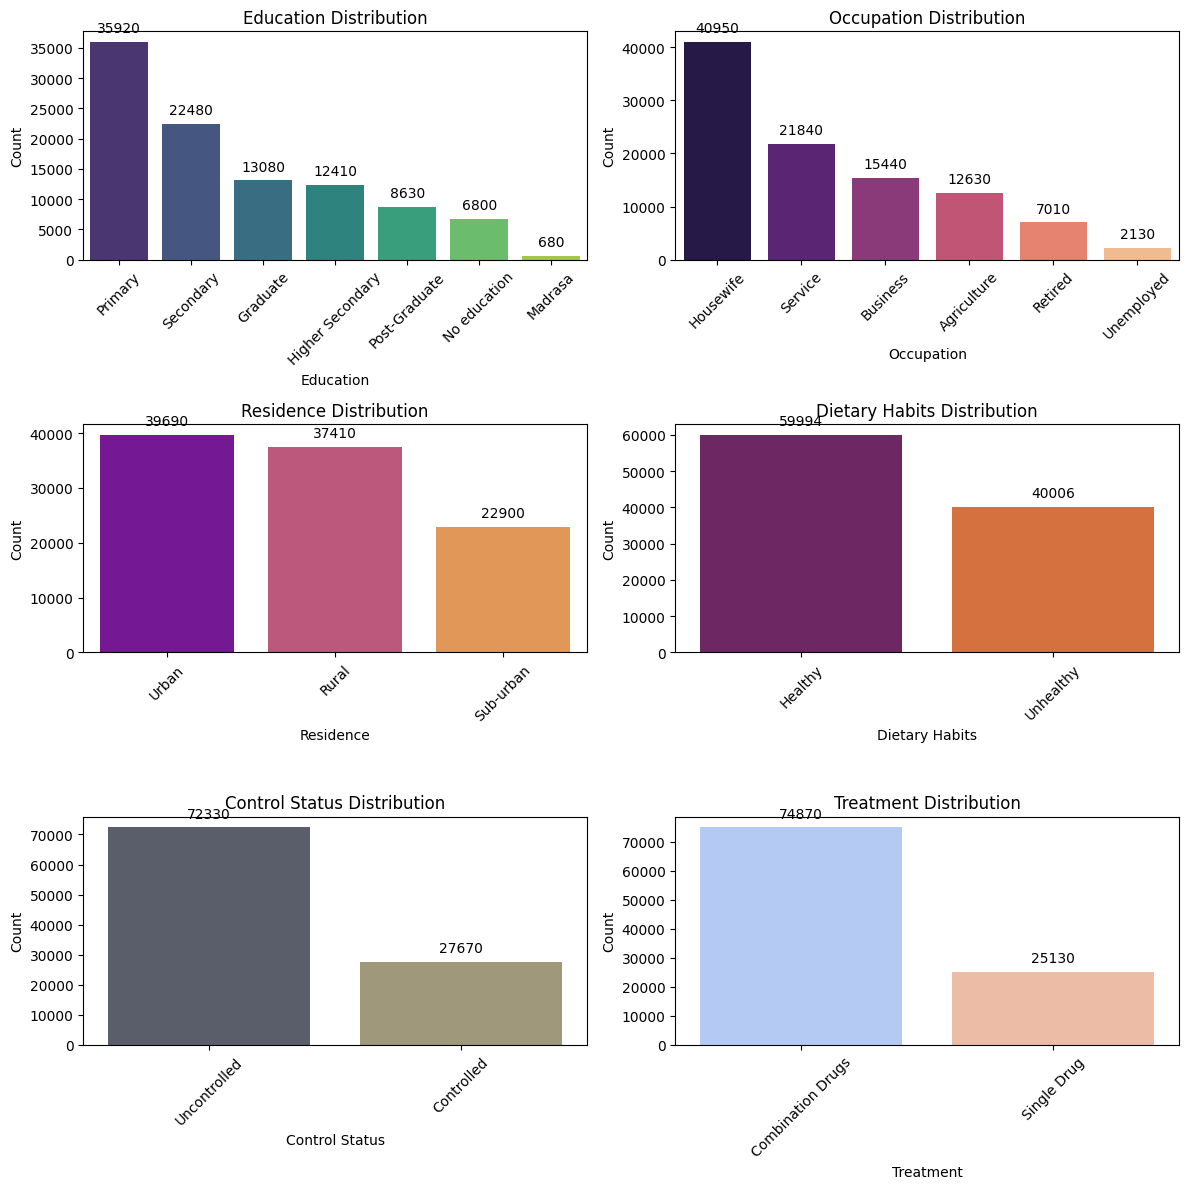

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
education_data = {
    'Primary': 35920,
    'Secondary': 22480,
    'Graduate': 13080,
    'Higher Secondary': 12410,
    'Post-Graduate': 8630,
    'No education': 6800,
    'Madrasa': 680
}

occupation_data = {
    'Housewife': 40950,
    'Service': 21840,
    'Business': 15440,
    'Agriculture': 12630,
    'Retired': 7010,
    'Unemployed': 2130
}

residence_data = {
    'Urban': 39690,
    'Rural': 37410,
    'Sub-urban': 22900
}

dietary_habits_data = {
    'Healthy': 59994,
    'Unhealthy': 40006
}

control_status_data = {
    'Uncontrolled': 72330,
    'Controlled': 27670
}

treatment_data = {
    'Combination Drugs': 74870,
    'Single Drug': 25130
}

# Convert to DataFrames
education_df = pd.DataFrame(list(education_data.items()), columns=['Education', 'Count'])
occupation_df = pd.DataFrame(list(occupation_data.items()), columns=['Occupation', 'Count'])
residence_df = pd.DataFrame(list(residence_data.items()), columns=['Residence', 'Count'])
dietary_habits_df = pd.DataFrame(list(dietary_habits_data.items()), columns=['Dietary Habits', 'Count'])
control_status_df = pd.DataFrame(list(control_status_data.items()), columns=['Control Status', 'Count'])
treatment_df = pd.DataFrame(list(treatment_data.items()), columns=['Treatment', 'Count'])

# Function to add values on bars
def add_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',  # Value to display
            (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the annotation
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
            fontsize=10,  # Font size
            color='black',  # Font color
            xytext=(0, 5),  # Offset from the bar
            textcoords='offset points'
        )

# Plotting
plt.figure(figsize=(12, 12))

# Education Distribution
plt.subplot(3, 2, 1)
ax1 = sns.barplot(x='Education', y='Count', data=education_df, palette='viridis')
plt.title('Education Distribution')
plt.xticks(rotation=45)
add_values_on_bars(ax1)

# Occupation Distribution
plt.subplot(3, 2, 2)
ax2 = sns.barplot(x='Occupation', y='Count', data=occupation_df, palette='magma')
plt.title('Occupation Distribution')
plt.xticks(rotation=45)
add_values_on_bars(ax2)

# Residence Distribution
plt.subplot(3, 2, 3)
ax3 = sns.barplot(x='Residence', y='Count', data=residence_df, palette='plasma')
plt.title('Residence Distribution')
plt.xticks(rotation=45)
add_values_on_bars(ax3)

# Dietary Habits Distribution
plt.subplot(3, 2, 4)
ax4 = sns.barplot(x='Dietary Habits', y='Count', data=dietary_habits_df, palette='inferno')
plt.title('Dietary Habits Distribution')
plt.xticks(rotation=45)
add_values_on_bars(ax4)

# Control Status Distribution
plt.subplot(3, 2, 5)
ax5 = sns.barplot(x='Control Status', y='Count', data=control_status_df, palette='cividis')
plt.title('Control Status Distribution')
plt.xticks(rotation=45)
add_values_on_bars(ax5)

# Treatment Distribution
plt.subplot(3, 2, 6)
ax6 = sns.barplot(x='Treatment', y='Count', data=treatment_df, palette='coolwarm')
plt.title('Treatment Distribution')
plt.xticks(rotation=45)
add_values_on_bars(ax6)

plt.tight_layout()
plt.show()

In [ ]:
!pip install lime shap scikit-learn pandas numpy matplotlib seaborn


Starting Comprehensive XAI Analysis...

Loading and preprocessing data...

Training model...

Model Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     18281
           1       1.00      0.00      0.01      1719

    accuracy                           0.91     20000
   macro avg       0.96      0.50      0.48     20000
weighted avg       0.92      0.91      0.87     20000


Calculating global feature importance...


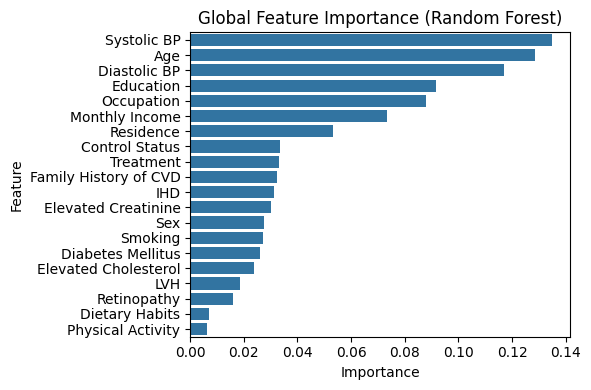


Performing SHAP analysis...
Error in SHAP analysis: only integer scalar arrays can be converted to a scalar index
Traceback (most recent call last):
  File "<ipython-input-30-01303e7af859>", line 130, in shap_analysis
    shap.summary_plot(
  File "/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py", line 595, in summary_legacy
    feature_names=feature_names[sort_inds],
TypeError: only integer scalar arrays can be converted to a scalar index


Performing LIME analysis...


<Figure size 600x400 with 0 Axes>

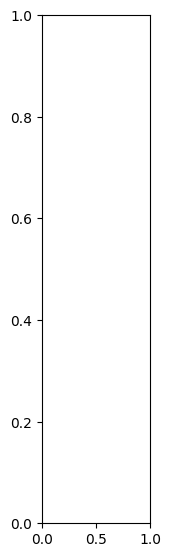

<Figure size 600x400 with 0 Axes>

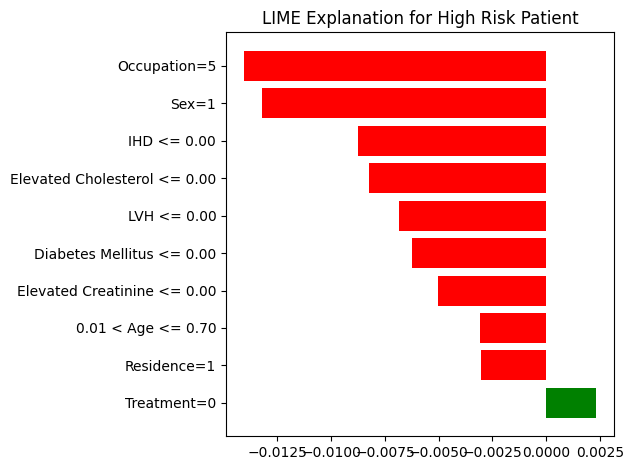

<Figure size 600x400 with 0 Axes>

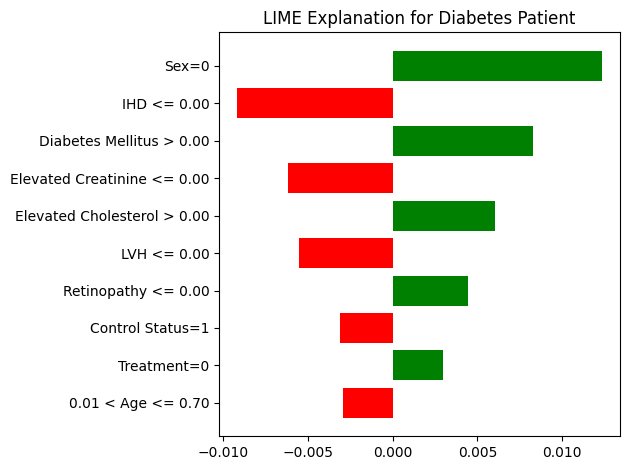

<Figure size 600x400 with 0 Axes>

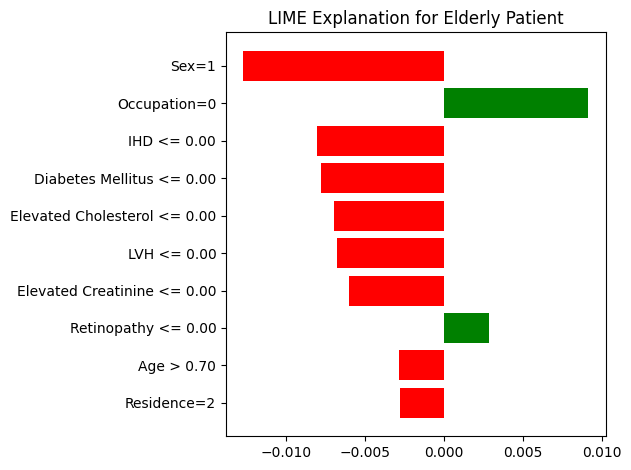


Analyzing feature interactions...


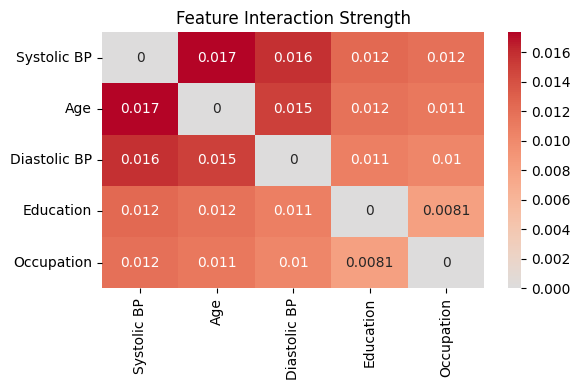


Calculating permutation importance...


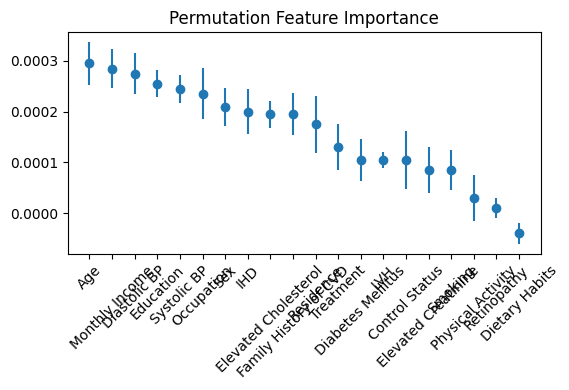


Analysis Complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import shap
from lime import lime_tabular
import warnings
warnings.filterwarnings('ignore')

class ComprehensiveXAI:
    def __init__(self):
        self.df = None
        self.X = None
        self.y = None
        self.model = None
        self.feature_names = None
        self.label_encoders = {}
        self.scaler = None
        self.categorical_features = None

    def load_and_preprocess(self, file_path):
        """Load and preprocess the data"""
        # Load data
        self.df = pd.read_excel(file_path)
        data = self.df.copy()

        # Define feature types
        categorical_cols = [
            'Sex', 'Education', 'Occupation', 'Residence',
            'Dietary Habits', 'Control Status', 'Treatment',
            'Monthly Income'
        ]
        numerical_cols = ['Age', 'Systolic BP', 'Diastolic BP']
        binary_cols = [
            'Elevated Creatinine', 'Diabetes Mellitus', 'Family History of CVD',
            'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD', 'Retinopathy',
            'Physical Activity'
        ]

        # Process categorical features
        for col in categorical_cols:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))
            self.label_encoders[col] = le

        # Process numerical features
        self.scaler = StandardScaler()
        data[numerical_cols] = self.scaler.fit_transform(data[numerical_cols])

        # Process binary features
        for col in binary_cols:
            data[col] = data[col].map({'Yes': 1, 'No': 0})

        # Prepare features and target
        self.y = LabelEncoder().fit_transform(self.df['CVD'])
        self.X = data.drop(['CVD'], axis=1)
        self.feature_names = self.X.columns.tolist()

        # Store categorical feature indices for LIME
        self.categorical_features = [self.feature_names.index(col) for col in categorical_cols]

        return self.X, self.y

    def train_model(self):
        """Train the Random Forest model"""
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            n_jobs=-1
        )

        self.model.fit(X_train, y_train)

        # Basic evaluation
        y_pred = self.model.predict(X_test)
        print("\nModel Performance:")
        print(classification_report(y_test, y_pred))

        return X_train, X_test, y_train, y_test

    def global_feature_importance(self):
        """Analyze global feature importance"""
        # Random Forest feature importance
        importance = pd.DataFrame({
            'Feature': self.feature_names,
            'Importance': self.model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(6, 4))
        sns.barplot(x='Importance', y='Feature', data=importance)
        plt.title('Global Feature Importance (Random Forest)')
        plt.tight_layout()
        plt.show()

        return importance

    def shap_analysis(self, X_test):
        """Perform SHAP analysis"""
        try:
            # Convert X_test to DataFrame if it's not already
            if not isinstance(X_test, pd.DataFrame):
                X_test = pd.DataFrame(X_test, columns=self.feature_names)

            # Create Tree SHAP explainer
            explainer = shap.TreeExplainer(self.model)

            # Calculate SHAP values
            shap_values = explainer.shap_values(X_test)

            # Summary plot
            plt.figure(figsize=(6, 4))
            if isinstance(shap_values, list):
                shap.summary_plot(
                    shap_values[1],
                    X_test,
                    plot_type="bar",
                    feature_names=self.feature_names,
                    show=False
                )
            else:
                shap.summary_plot(
                    shap_values,
                    X_test,
                    plot_type="bar",
                    feature_names=self.feature_names,
                    show=False
                )

            plt.title("SHAP Feature Importance")
            plt.tight_layout()
            plt.show()

            # Force plot for first few predictions
            plt.figure(figsize=(20, 3))
            if isinstance(shap_values, list):
                shap_display = shap.force_plot(
                    explainer.expected_value[1],
                    shap_values[1][0,:],
                    X_test.iloc[0,:],
                    feature_names=self.feature_names,
                    matplotlib=True,
                    show=False
                )
            else:
                shap_display = shap.force_plot(
                    explainer.expected_value,
                    shap_values[0,:],
                    X_test.iloc[0,:],
                    feature_names=self.feature_names,
                    matplotlib=True,
                    show=False
                )
            plt.title("SHAP Force Plot (First Sample)")
            plt.tight_layout()
            plt.show()

            return explainer, shap_values

        except Exception as e:
            print(f"Error in SHAP analysis: {str(e)}")
            import traceback
            print(traceback.format_exc())
            return None, None

    def lime_analysis(self, X_train, X_test):
        """Perform LIME analysis"""
        # Initialize LIME explainer
        explainer = lime_tabular.LimeTabularExplainer(
            X_train.values,
            feature_names=self.feature_names,
            class_names=['No CVD', 'CVD'],
            categorical_features=self.categorical_features,
            mode='classification'
        )

        # Select key variables for explanation
        variables_to_explain = {
            'High Risk': X_test[X_test['Systolic BP'] > 1.5].iloc[0],  # High blood pressure case
            'Diabetes': X_test[X_test['Diabetes Mellitus'] == 1].iloc[0],  # Patient with diabetes
            'Elderly': X_test[X_test['Age'] > 1.0].iloc[0]  # Elderly patient
        }

        for case_name, case_data in variables_to_explain.items():
            plt.figure(figsize=(6, 4))
            exp = explainer.explain_instance(
                case_data.values,
                self.model.predict_proba,
                num_features=10
            )
            exp.as_pyplot_figure()
            plt.title(f'LIME Explanation for {case_name} Patient')
            plt.tight_layout()
            plt.show()

        return explainer

    def feature_interactions(self, X_test):
        """Analyze feature interactions using Random Forest feature importance"""
        try:
            # Get feature importance
            importance = pd.DataFrame({
                'Feature': self.feature_names,
                'Importance': self.model.feature_importances_
            }).sort_values('Importance', ascending=False)

            # Get top 5 features
            top_features = importance.head(5)['Feature'].tolist()

            # Create interaction matrix
            n_features = len(top_features)
            interaction_matrix = np.zeros((n_features, n_features))

            # Calculate feature interactions using joint importance
            for i in range(n_features):
                for j in range(n_features):
                    if i != j:
                        feature1 = top_features[i]
                        feature2 = top_features[j]
                        idx1 = self.feature_names.index(feature1)
                        idx2 = self.feature_names.index(feature2)

                        # Use feature importance as interaction strength
                        interaction_matrix[i, j] = (
                            self.model.feature_importances_[idx1] *
                            self.model.feature_importances_[idx2]
                        )

            # Plot interaction matrix
            interaction_df = pd.DataFrame(
                interaction_matrix,
                columns=top_features,
                index=top_features
            )

            plt.figure(figsize=(6, 4))
            sns.heatmap(interaction_df, annot=True, cmap='coolwarm', center=0)
            plt.title('Feature Interaction Strength')
            plt.tight_layout()
            plt.show()

            return interaction_df

        except Exception as e:
            print(f"Error in feature interaction analysis: {str(e)}")
            import traceback
            print(traceback.format_exc())
            return None

    def permutation_importance(self, X_test, y_test):
        """Calculate permutation importance"""
        from sklearn.inspection import permutation_importance

        r = permutation_importance(
            self.model, X_test, y_test,
            n_repeats=10,
            random_state=42,
            n_jobs=-1
        )

        perm_importance = pd.DataFrame(
            {'Feature': self.feature_names,
             'Importance': r.importances_mean,
             'Std': r.importances_std}
        ).sort_values('Importance', ascending=False)

        plt.figure(figsize=(6, 4))
        plt.errorbar(
            x=range(len(perm_importance)),
            y=perm_importance['Importance'],
            yerr=perm_importance['Std'],
            fmt='o'
        )
        plt.xticks(range(len(perm_importance)), perm_importance['Feature'], rotation=45)
        plt.title('Permutation Feature Importance')
        plt.tight_layout()
        plt.show()

        return perm_importance

    def run_complete_analysis(self, file_path):
        """Run all explainable AI analyses"""
        print("Starting Comprehensive XAI Analysis...")

        # Load and preprocess data
        print("\nLoading and preprocessing data...")
        self.load_and_preprocess(file_path)

        # Train model
        print("\nTraining model...")
        X_train, X_test, y_train, y_test = self.train_model()

        # Global feature importance
        print("\nCalculating global feature importance...")
        importance = self.global_feature_importance()

        # SHAP analysis
        print("\nPerforming SHAP analysis...")
        explainer, shap_values = self.shap_analysis(X_test)

        # LIME analysis
        print("\nPerforming LIME analysis...")
        lime_explainer = self.lime_analysis(X_train, X_test)

        # Feature interactions
        print("\nAnalyzing feature interactions...")
        interactions = self.feature_interactions(X_test)

        # Permutation importance
        print("\nCalculating permutation importance...")
        perm_importance = self.permutation_importance(X_test, y_test)

        print("\nAnalysis Complete!")

        return {
            'feature_importance': importance,
            'shap_values': shap_values,
            'interactions': interactions,
            'permutation_importance': perm_importance
        }

# Example usage
if __name__ == "__main__":
    xai = ComprehensiveXAI()
    results = xai.run_complete_analysis('Expanded_Hypertension_Dataset.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import shap

# Import models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

class CVDModelAnalysis:
    def __init__(self):
        self.numerical_features = ['Age', 'Systolic BP', 'Diastolic BP']
        self.categorical_features = [
            'Sex', 'Education', 'Occupation', 'Residence',
            'Dietary Habits', 'Control Status', 'Treatment',
            'Monthly Income'
        ]
        self.binary_features = [
            'Elevated Creatinine', 'Diabetes Mellitus', 'Family History of CVD',
            'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD', 'Retinopathy',
            'Physical Activity'
        ]
        self.models = {
            'XGBoost': XGBClassifier(n_estimators=100, random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
            'SVM': SVC(probability=True, random_state=42),
            'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
        }

    def preprocess_data(self, data):
        """Preprocess data with one-hot encoding"""
        # Handle numerical features
        data_numerical = data[self.numerical_features]
        scaler = StandardScaler()
        data_numerical_scaled = pd.DataFrame(
            scaler.fit_transform(data_numerical),
            columns=self.numerical_features
        )

        # Handle categorical features
        data_categorical = data[self.categorical_features]
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_data = encoder.fit_transform(data_categorical)
        encoded_columns = encoder.get_feature_names_out(self.categorical_features)
        data_categorical_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

        # Handle binary features
        data_binary = data[self.binary_features].copy()
        for col in self.binary_features:
            data_binary[col] = data_binary[col].map({'Yes': 1, 'No': 0})

        # Combine all features
        data_processed = pd.concat(
            [data_numerical_scaled, data_categorical_encoded, data_binary],
            axis=1
        )

        # Encode target variable
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(data['CVD'])

        feature_names = (list(data_numerical.columns) +
                        list(encoded_columns) +
                        list(data_binary.columns))

        return data_processed, y, feature_names

    def evaluate_models(self, X, y):
        """Evaluate all models and return results"""
        results = {}
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            model.fit(X_train, y_train)

            # Get predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

            # Calculate metrics
            metrics = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1': f1_score(y_test, y_pred),
                'AUC': roc_curve(y_test, y_pred_proba)[0]  # fpr
            }

            results[name] = {
                'metrics': metrics,
                'model': model,
                'predictions': (y_pred, y_pred_proba)
            }

            print(f"Performance metrics for {name}:")
            for metric, value in metrics.items():
                if metric != 'AUC':
                    print(f"{metric}: {value:.3f}")

        return results, X_train, X_test, y_train, y_test

    def plot_model_comparison(self, results):
        """Plot model comparison with values"""
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
        model_names = list(results.keys())

        # Create comparison DataFrame
        comparison_data = []
        for model in model_names:
            model_metrics = [results[model]['metrics'][m] for m in metrics]
            comparison_data.append(model_metrics)

        comparison_df = pd.DataFrame(comparison_data, columns=metrics, index=model_names)

        # Plot with values
        plt.figure(figsize=(6, 4))
        ax = comparison_df.plot(kind='bar', width=0.8)
        plt.title('Model Performance Comparison')
        plt.xlabel('Models')
        plt.ylabel('Score')

        # Add value annotations
        for i in range(len(model_names)):
            for j in range(len(metrics)):
                plt.text(i, comparison_df.iloc[i, j],
                        f'{comparison_df.iloc[i, j]:.3f}',
                        ha='center', va='bottom')

        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return comparison_df

    def plot_shap_analysis(self, best_model, X, feature_names):
        """Plot SHAP analysis with values"""
        # Create SHAP explainer
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X)

        # Summary plot with values
        plt.figure(figsize=(6, 4))
        shap.summary_plot(
            shap_values[1] if isinstance(shap_values, list) else shap_values,
            X,
            feature_names=feature_names,
            plot_type="violin",
            show=False
        )

        # Add value annotations
        ax = plt.gca()
        for i in range(len(feature_names)):
            shap_vals = shap_values[1][:, i] if isinstance(shap_values, list) else shap_values[:, i]
            mean_shap = np.abs(shap_vals).mean()
            ax.text(mean_shap, i, f'{mean_shap:.3f}',
                   va='center', ha='left', fontsize=8)

        plt.title('SHAP Feature Importance')
        plt.tight_layout()
        plt.show()

    def analyze_cvd_data(self, data):
        """Run complete analysis pipeline"""
        print("Starting CVD Analysis...")

        # Preprocess data
        print("Preprocessing data...")
        X, y, feature_names = self.preprocess_data(data)

        # Evaluate models
        print("Evaluating models...")
        results, X_train, X_test, y_train, y_test = self.evaluate_models(X, y)

        # Plot model comparison
        print("Plotting model comparison...")
        comparison_df = self.plot_model_comparison(results)

        # Find best model
        best_model_name = comparison_df['F1'].idxmax()
        best_model = self.models[best_model_name]

        # SHAP analysis for best model
        print(f"\nPerforming SHAP analysis for best model ({best_model_name})...")
        self.plot_shap_analysis(best_model, X_test, feature_names)

        return results, comparison_df, best_model

# Example usage
if __name__ == "__main__":
    # Load data
    data = pd.read_excel('Expanded_Hypertension_Dataset.xlsx')

    # Initialize and run analysis
    analyzer = CVDModelAnalysis()
    results, comparison_df, best_model = analyzer.analyze_cvd_data(data)

Starting CVD Analysis...
Preprocessing data...
Evaluating models...

Training XGBoost...


ValueError: feature_names must be string, and may not contain [, ] or <

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import shap

# Import models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

class CVDModelAnalysis:
    def __init__(self):
        self.numerical_features = ['Age', 'Systolic BP', 'Diastolic BP']
        self.categorical_features = [
            'Sex', 'Education', 'Occupation', 'Residence',
            'Dietary Habits', 'Control Status', 'Treatment',
            'Monthly Income'
        ]
        self.binary_features = [
            'Elevated Creatinine', 'Diabetes Mellitus', 'Family History of CVD',
            'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD', 'Retinopathy',
            'Physical Activity'
        ]
        self.models = {
            'XGBoost': XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
            'SVM': SVC(probability=True, random_state=42),
            'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
        }

    def preprocess_data(self, data):
        """Preprocess data with one-hot encoding"""
        # Handle numerical features
        data_numerical = data[self.numerical_features]
        scaler = StandardScaler()
        data_numerical_scaled = pd.DataFrame(
            scaler.fit_transform(data_numerical),
            columns=self.numerical_features
        )

        # Handle categorical features
        data_categorical = data[self.categorical_features]
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_data = encoder.fit_transform(data_categorical)
        encoded_columns = encoder.get_feature_names_out(self.categorical_features)

        # Ensure feature names are valid
        encoded_columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '')
                           for col in encoded_columns]
        data_categorical_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

        # Handle binary features
        data_binary = data[self.binary_features].copy()
        for col in self.binary_features:
            data_binary[col] = data_binary[col].map({'Yes': 1, 'No': 0})

        # Combine all features
        data_processed = pd.concat(
            [data_numerical_scaled, data_categorical_encoded, data_binary],
            axis=1
        )

        # Encode target variable
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(data['CVD'])

        feature_names = (list(data_numerical.columns) +
                        list(encoded_columns) +
                        list(data_binary.columns))

        return data_processed, y, feature_names

    def evaluate_models(self, X, y):
        """Evaluate all models and return results"""
        results = {}
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            model.fit(X_train, y_train)

            # Get predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

            # Calculate metrics
            metrics = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1': f1_score(y_test, y_pred),
                'AUC': auc(*roc_curve(y_test, y_pred_proba)[:2])
            }

            results[name] = {
                'metrics': metrics,
                'model': model,
                'predictions': (y_pred, y_pred_proba)
            }

            print(f"Performance metrics for {name}:")
            for metric, value in metrics.items():
                print(f"{metric}: {value:.3f}")

        return results, X_train, X_test, y_train, y_test

    def plot_model_comparison(self, results):
        """Plot model comparison with values"""
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
        model_names = list(results.keys())

        # Create comparison DataFrame
        comparison_data = []
        for model in model_names:
            model_metrics = [results[model]['metrics'][m] for m in metrics]
            comparison_data.append(model_metrics)

        comparison_df = pd.DataFrame(comparison_data, columns=metrics, index=model_names)

        # Plot with values
        comparison_df.plot(kind='bar', figsize=(12, 6), width=0.8)
        plt.title('Model Performance Comparison')
        plt.xlabel('Models')
        plt.ylabel('Score')
        plt.xticks(rotation=45)
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

        return comparison_df

    def plot_shap_analysis(self, best_model, X, feature_names):
        """Plot SHAP analysis with values"""
        # Create SHAP explainer
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X)

        # Summary plot
        shap.summary_plot(shap_values, X, feature_names=feature_names)

    def analyze_cvd_data(self, data):
        """Run complete analysis pipeline"""
        print("Starting CVD Analysis...")

        # Preprocess data
        print("Preprocessing data...")
        X, y, feature_names = self.preprocess_data(data)

        # Evaluate models
        print("Evaluating models...")
        results, X_train, X_test, y_train, y_test = self.evaluate_models(X, y)

        # Plot model comparison
        print("Plotting model comparison...")
        comparison_df = self.plot_model_comparison(results)

        # Find best model
        best_model_name = comparison_df['F1'].idxmax()
        best_model = self.models[best_model_name]

        # SHAP analysis for best model
        print(f"\nPerforming SHAP analysis for best model ({best_model_name})...")
        self.plot_shap_analysis(best_model, X_test, feature_names)

        return results, comparison_df, best_model

# Example usage
if __name__ == "__main__":
    # Load data
    data = pd.read_excel('Expanded_Hypertension_Dataset.xlsx')

    # Initialize and run analysis
    analyzer = CVDModelAnalysis()
    results, comparison_df, best_model = analyzer.analyze_cvd_data(data)

In [ ]:
pip install shap --upgrade

In [ ]:
df = pd.read_excel('/content/Expanded_Hypertension_Dataset_2.xlsx')
df.columns

Index(['Age', 'Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
       'Systolic BP', 'Diastolic BP', 'Elevated Creatinine',
       'Diabetes Mellitus', 'Family History of CVD', 'Elevated Cholesterol',
       'Smoking', 'LVH', 'IHD', 'CVD', 'Retinopathy', 'Treatment',
       'Control Status', 'Physical Activity', 'Dietary Habits'],
      dtype='object')

Starting SHAP Analysis...

Generating Bar Plot...


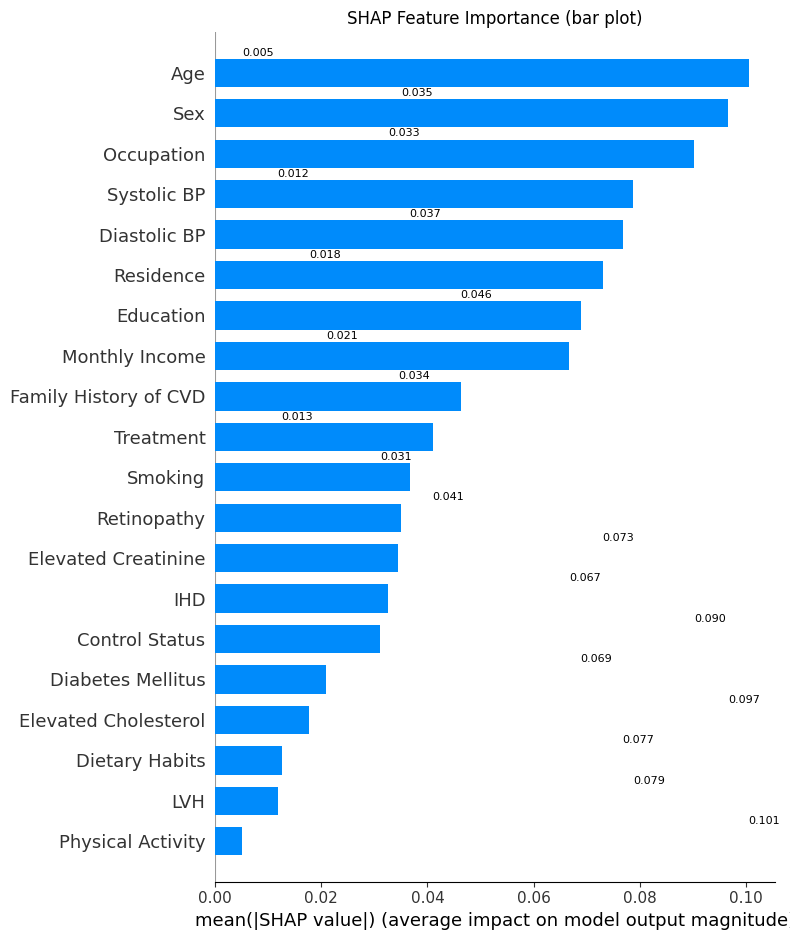

Generating Beeswarm Plot...


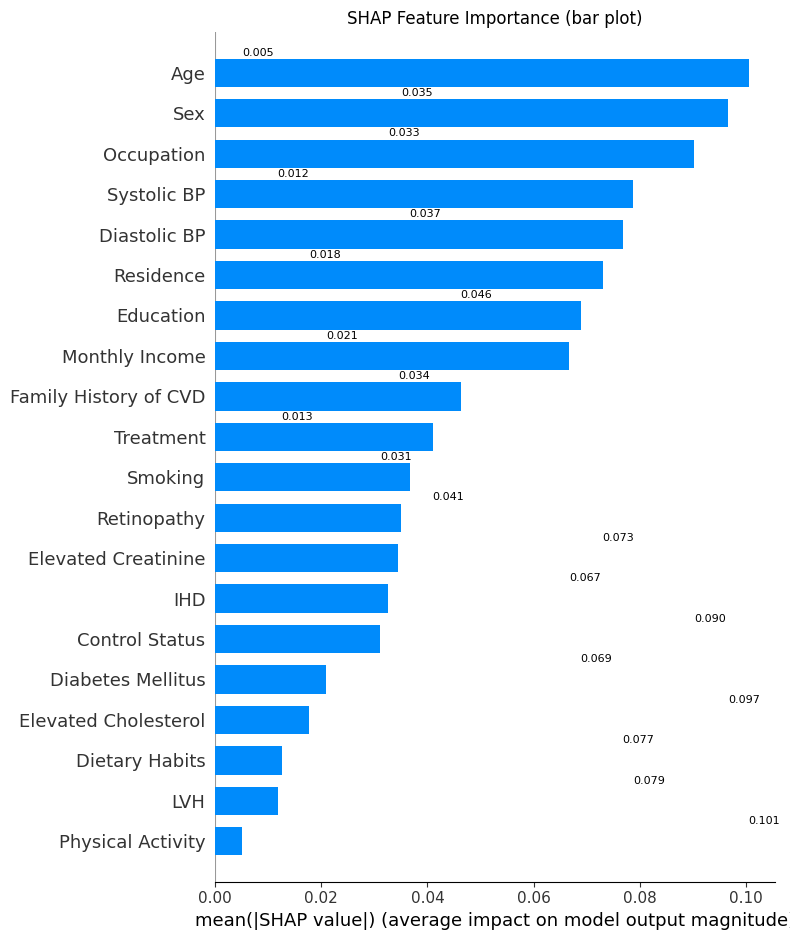


Feature Importance Values:
Age: 0.1005
Sex: 0.0967
Occupation: 0.0902
Systolic BP: 0.0787
Diastolic BP: 0.0768
Residence: 0.0730
Education: 0.0689
Monthly Income: 0.0667
Family History of CVD: 0.0462
Treatment: 0.0410
Smoking: 0.0366
Retinopathy: 0.0350
Elevated Creatinine: 0.0344
IHD: 0.0326
Control Status: 0.0311
Diabetes Mellitus: 0.0209
Elevated Cholesterol: 0.0177
Dietary Habits: 0.0125
LVH: 0.0117
Physical Activity: 0.0050

Generating Dependence Plots for Top 5 Features...


<Figure size 600x400 with 0 Axes>

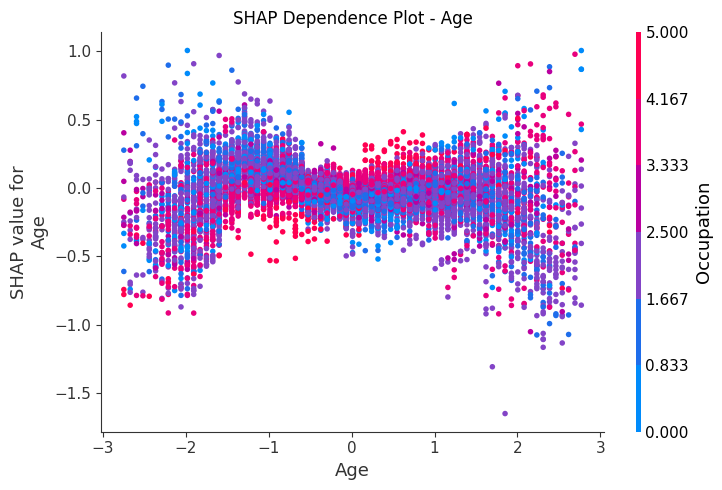

<Figure size 600x400 with 0 Axes>

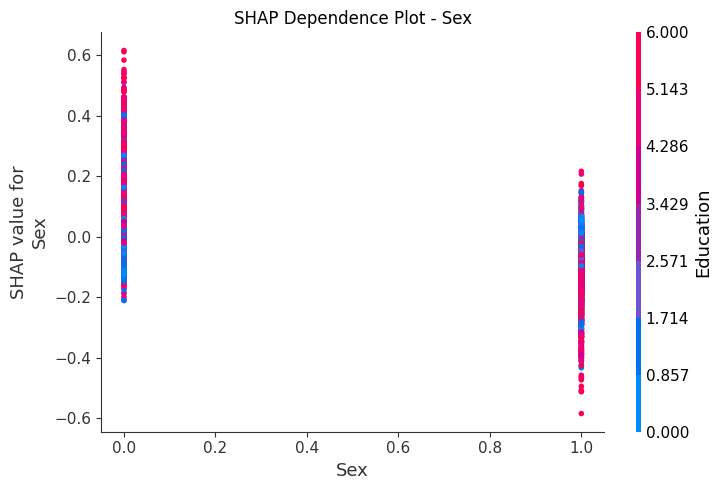

<Figure size 600x400 with 0 Axes>

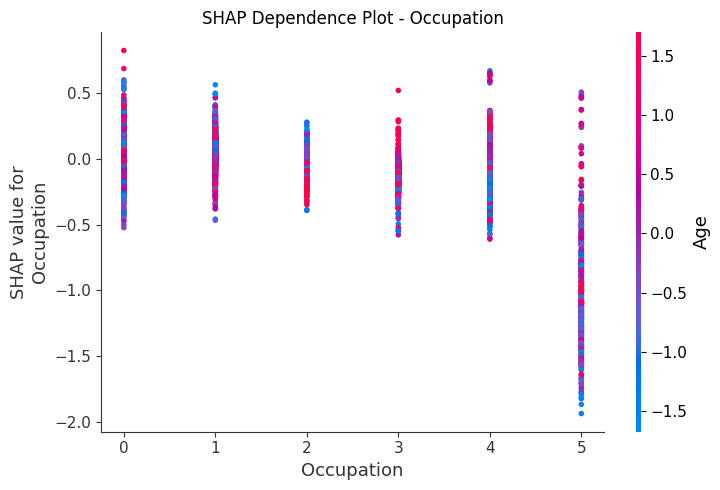

<Figure size 600x400 with 0 Axes>

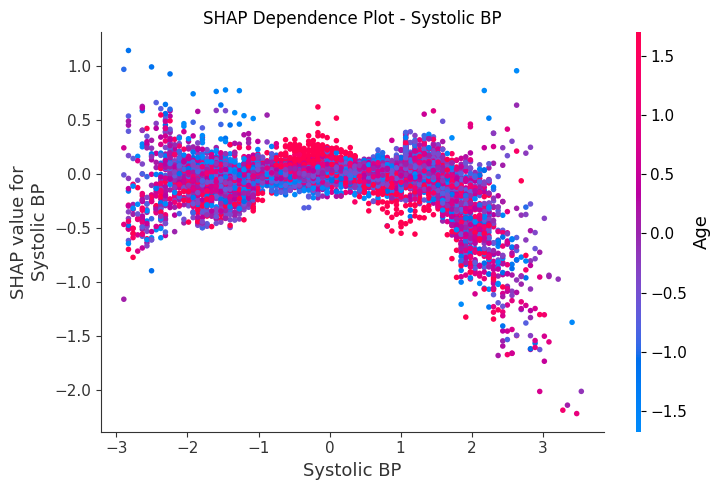

<Figure size 600x400 with 0 Axes>

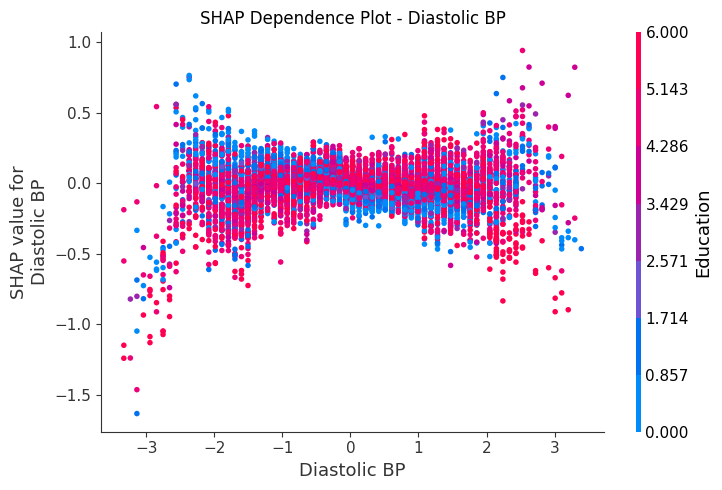

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

class SHAPAnalysis:
    def __init__(self):
        # Define features exactly as in dataset
        self.numerical_features = ['Age', 'Systolic BP', 'Diastolic BP']

        self.categorical_features = [
            'Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
            'Treatment', 'Control Status', 'Dietary Habits'
        ]

        self.binary_features = [
            'Elevated Creatinine', 'Diabetes Mellitus', 'Family History of CVD',
            'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD', 'Retinopathy',
            'Physical Activity'
        ]

        self.target = 'CVD'

    def preprocess_data(self, data):
        """Preprocess data while maintaining original feature names"""
        # Create copy of data
        processed_data = data.copy()

        # Handle numerical features
        scaler = StandardScaler()
        processed_data[self.numerical_features] = scaler.fit_transform(data[self.numerical_features])

        # Handle categorical features
        le = LabelEncoder()
        for col in self.categorical_features:
            processed_data[col] = le.fit_transform(data[col].astype(str))

        # Handle binary features
        for col in self.binary_features:
            processed_data[col] = data[col].map({'Yes': 1, 'No': 0})

        # Prepare target
        y = le.fit_transform(data[self.target])

        # Prepare feature matrix
        feature_cols = self.numerical_features + self.categorical_features + self.binary_features
        X = processed_data[feature_cols]

        return X, y, feature_cols

    def plot_shap_summary(self, shap_values, X, plot_type="bar"):
        """Plot SHAP summary with custom formatting"""
        plt.figure(figsize=(6, 4))
        if plot_type == "bar":
            shap.summary_plot(
                shap_values,
                X,
                plot_type=plot_type,
                show=False
            )

            # Add value annotations
            ax = plt.gca()
            feature_importance = np.abs(shap_values).mean(0)
            sorted_idx = np.argsort(feature_importance)
            pos = np.arange(len(feature_importance)) + .5

            for i in sorted_idx:
                ax.text(feature_importance[i], pos[i], f'{feature_importance[i]:.3f}',
                       va='center', ha='left', fontsize=8)
        else:
            shap.summary_plot(
                shap_values,
                X,
                show=False
            )

        plt.title(f"SHAP Feature Importance ({plot_type} plot)")
        plt.tight_layout()
        plt.show()

    def analyze_data(self, data):
        """Perform SHAP analysis"""
        print("Starting SHAP Analysis...")

        # Preprocess data
        X, y, feature_cols = self.preprocess_data(data)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Train XGBoost model
        model = XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            random_state=42
        )
        model.fit(X_train, y_train)

        # Calculate SHAP values
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)

        # For binary classification, use class 1 SHAP values
        if isinstance(shap_values, list):
            shap_values_plot = shap_values[1]
        else:
            shap_values_plot = shap_values

        # Plot 1: Bar plot with values
        print("\nGenerating Bar Plot...")
        self.plot_shap_summary(shap_values_plot, X_test, "bar")

        # Plot 2: Beeswarm plot
        print("Generating Beeswarm Plot...")
        self.plot_shap_summary(shap_values_plot, X_test)

        # Calculate and display feature importance
        feature_importance = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': np.abs(shap_values_plot).mean(0)
        }).sort_values('Importance', ascending=False)

        print("\nFeature Importance Values:")
        for idx, row in feature_importance.iterrows():
            print(f"{row['Feature']}: {row['Importance']:.4f}")

        # Plot 3: Dependence plots for top 5 features
        print("\nGenerating Dependence Plots for Top 5 Features...")
        top_features = feature_importance['Feature'].head(5).tolist()

        for feature in top_features:
            plt.figure(figsize=(6, 4))
            shap.dependence_plot(
                feature,
                shap_values_plot,
                X_test,
                show=False
            )
            plt.title(f"SHAP Dependence Plot - {feature}")
            plt.tight_layout()
            plt.show()

        return feature_importance, shap_values_plot, X_test

# Example usage
def run_shap_analysis(file_path):
    """Run SHAP analysis on the dataset"""
    # Load data
    data = pd.read_excel(file_path)

    # Initialize analyzer
    analyzer = SHAPAnalysis()

    # Run analysis
    importance, shap_values, X_test = analyzer.analyze_data(data)

    return importance, shap_values, X_test

if __name__ == "__main__":
    # Run analysis
    importance, shap_values, X_test = run_shap_analysis('Expanded_Hypertension_Dataset_2.xlsx')

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1508abd11d27dec35b974d84aae279554c4666d13450f1dcd43795fb9e3c939e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime



Analyzing High Risk Case:
--------------------------------------------------
Predicted Class: CVD
Probability of CVD: 0.991


<Figure size 600x400 with 0 Axes>

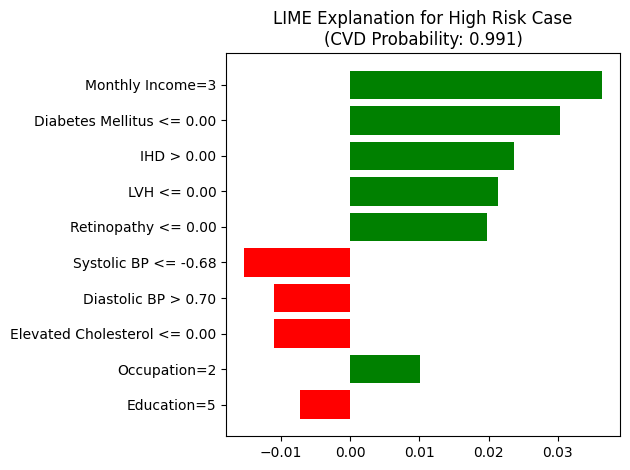


Feature Contributions:
Monthly Income=3: 0.0364
Diabetes Mellitus <= 0.00: 0.0303
IHD > 0.00: 0.0237
LVH <= 0.00: 0.0213
Retinopathy <= 0.00: 0.0197
Systolic BP <= -0.68: -0.0153
Diastolic BP > 0.70: -0.0110
Elevated Cholesterol <= 0.00: -0.0109
Occupation=2: 0.0101
Education=5: -0.0071

Analyzing Low Risk Case:
--------------------------------------------------
Predicted Class: No CVD
Probability of CVD: 0.000


<Figure size 600x400 with 0 Axes>

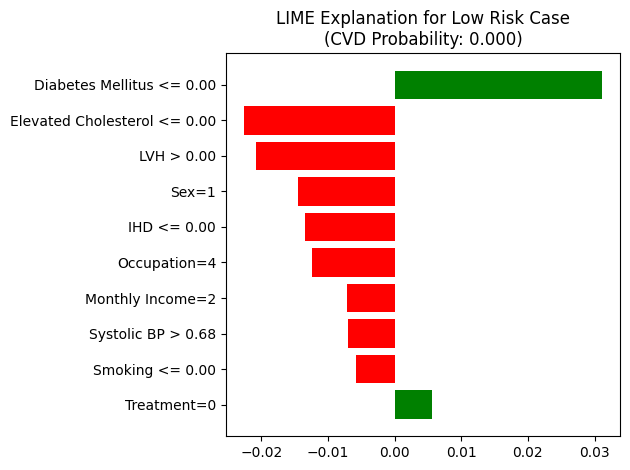


Feature Contributions:
Diabetes Mellitus <= 0.00: 0.0311
Elevated Cholesterol <= 0.00: -0.0226
LVH > 0.00: -0.0208
Sex=1: -0.0145
IHD <= 0.00: -0.0134
Occupation=4: -0.0124
Monthly Income=2: -0.0072
Systolic BP > 0.68: -0.0070
Smoking <= 0.00: -0.0058
Treatment=0: 0.0056

Analyzing Moderate Risk Case:
--------------------------------------------------
Predicted Class: No CVD
Probability of CVD: 0.056


<Figure size 600x400 with 0 Axes>

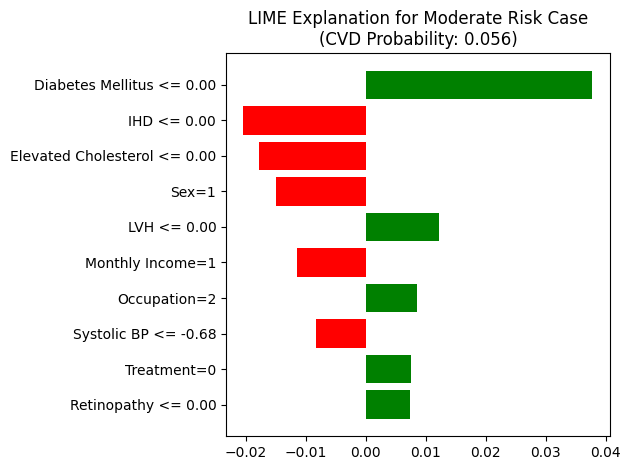


Feature Contributions:
Diabetes Mellitus <= 0.00: 0.0378
IHD <= 0.00: -0.0204
Elevated Cholesterol <= 0.00: -0.0178
Sex=1: -0.0150
LVH <= 0.00: 0.0122
Monthly Income=1: -0.0114
Occupation=2: 0.0085
Systolic BP <= -0.68: -0.0082
Treatment=0: 0.0076
Retinopathy <= 0.00: 0.0075


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lime import lime_tabular
import warnings
warnings.filterwarnings('ignore')

def create_lime_analysis(data):
    """Create LIME analysis for the dataset"""
    # Prepare features and target
    features = ['Age', 'Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
               'Systolic BP', 'Diastolic BP', 'Elevated Creatinine', 'Diabetes Mellitus',
               'Family History of CVD', 'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD',
               'Retinopathy', 'Treatment', 'Control Status', 'Physical Activity',
               'Dietary Habits']

    # Define feature types
    categorical_features = ['Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
                          'Treatment', 'Control Status', 'Dietary Habits']
    binary_features = ['Elevated Creatinine', 'Diabetes Mellitus', 'Family History of CVD',
                      'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD', 'Retinopathy',
                      'Physical Activity']
    numerical_features = ['Age', 'Systolic BP', 'Diastolic BP']

    # Get feature indices for LIME
    categorical_indices = [features.index(feat) for feat in categorical_features]

    # Prepare data
    X = data[features].copy()

    # Preprocess features
    # Handle categorical features
    for col in categorical_features:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

    # Handle binary features
    for col in binary_features:
        X[col] = X[col].map({'Yes': 1, 'No': 0})

    # Scale numerical features
    scaler = StandardScaler()
    X[numerical_features] = scaler.fit_transform(X[numerical_features])

    # Encode target
    le_target = LabelEncoder()
    y = le_target.fit_transform(data['CVD'])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train model
    model = XGBClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Create LIME explainer
    explainer = lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=features,
        class_names=['No CVD', 'CVD'],
        categorical_features=categorical_indices,
        categorical_names={i: sorted(X[feat].unique())
                         for i, feat in enumerate(features)
                         if feat in categorical_features},
        mode='classification',
        training_labels=y_train
    )

    # Get predictions for test set
    test_probs = model.predict_proba(X_test)[:, 1]

    # Select interesting cases
    high_risk_idx = np.argmax(test_probs)
    low_risk_idx = np.argmin(test_probs)
    med_risk_idx = np.argsort(test_probs)[len(test_probs)//2]

    test_cases = {
        'High Risk': X_test.iloc[high_risk_idx],
        'Low Risk': X_test.iloc[low_risk_idx],
        'Moderate Risk': X_test.iloc[med_risk_idx]
    }

    # Generate explanations for each case
    for case_name, instance in test_cases.items():
        print(f"\nAnalyzing {case_name} Case:")
        print("-" * 50)

        # Get prediction and probability
        prob = model.predict_proba(instance.values.reshape(1, -1))[0]
        pred_class = "CVD" if prob[1] > 0.5 else "No CVD"

        print(f"Predicted Class: {pred_class}")
        print(f"Probability of CVD: {prob[1]:.3f}")

        # Generate LIME explanation
        exp = explainer.explain_instance(
            instance.values,
            model.predict_proba,
            num_features=10,
            labels=(1,)  # Explain prediction for CVD class
        )

        # Plot the explanation
        plt.figure(figsize=(6, 4))
        exp.as_pyplot_figure()
        plt.title(f"LIME Explanation for {case_name} Case\n(CVD Probability: {prob[1]:.3f})")
        plt.tight_layout()
        plt.show()

        # Print feature importances
        print("\nFeature Contributions:")
        for feat, imp in exp.as_list(label=1):  # Get explanations for CVD class
            print(f"{feat}: {imp:.4f}")

# Run the analysis
def run_lime_analysis(file_path):
    """Run LIME analysis on CVD dataset"""
    data = pd.read_excel(file_path)
    create_lime_analysis(data)

if __name__ == "__main__":
    run_lime_analysis('Expanded_Hypertension_Dataset_2.xlsx')

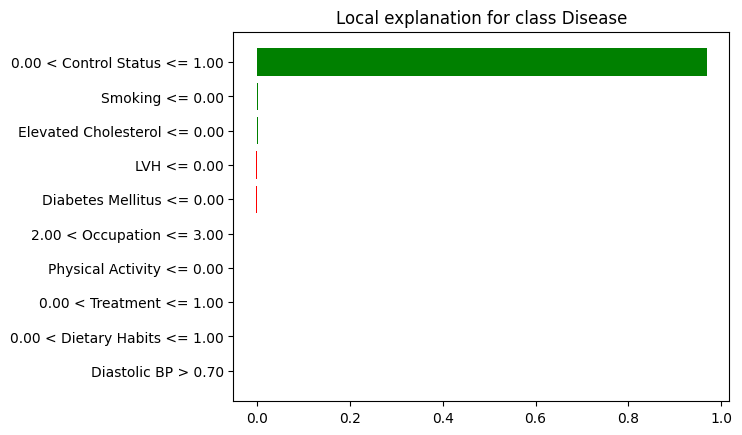

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Expanded_Hypertension_Dataset_2.xlsx'
data = pd.read_excel(file_path)

# Prepare features and target
features = ['Age', 'Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
            'Systolic BP', 'Diastolic BP', 'Elevated Creatinine', 'Diabetes Mellitus',
            'Family History of CVD', 'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD',
            'Retinopathy', 'Treatment', 'Control Status', 'Physical Activity',
            'Dietary Habits']
target = 'Control Status'

# Define feature types
categorical_features = ['Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
                        'Treatment', 'Control Status', 'Dietary Habits']
binary_features = ['Elevated Creatinine', 'Diabetes Mellitus', 'Family History of CVD',
                   'Elevated Cholesterol', 'Smoking', 'LVH', 'IHD', 'Retinopathy',
                   'Physical Activity']
numerical_features = ['Age', 'Systolic BP', 'Diastolic BP']

# Encode categorical and binary features
label_encoders = {}
for col in categorical_features + binary_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Prepare the data
X = data[features]
y = LabelEncoder().fit_transform(data[target])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# LIME analysis
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['No Disease', 'Disease'],
    mode='classification'
)

# Explain a single instance
instance_idx = 0  # Choose the first instance
exp = explainer.explain_instance(X_test.iloc[instance_idx].values, model.predict_proba, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()
plt.show()

In [ ]:
df=pd.read_excel('/content/Expanded_Hypertension_Dataset_2.xlsx')
df.columns

Index(['Age', 'Sex', 'Education', 'Occupation', 'Monthly Income', 'Residence',
       'Systolic BP', 'Diastolic BP', 'Elevated Creatinine',
       'Diabetes Mellitus', 'Family History of CVD', 'Elevated Cholesterol',
       'Smoking', 'LVH', 'IHD', 'CVD', 'Retinopathy', 'Treatment',
       'Control Status', 'Physical Activity', 'Dietary Habits'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Load dataset
file_path = '/content/Expanded_Hypertension_Dataset_2.xlsx'
data = pd.read_excel(file_path)

# Identify target variable
target = 'Control Status'
features = [col for col in data.columns if col != target]

# Encode all non-numeric columns
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category').cat.codes

# Update feature list to match encoded data
features = [col for col in data.columns if col != target]

# Split the dataset
X = data[features]
y = data[target]

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Perform permutation importance for sensitivity analysis
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display sensitivity analysis results
print("Sensitivity Analysis Results:")
print(importance_df)



Sensitivity Analysis Results:
                  Feature  Importance
3              Occupation    0.134940
2               Education    0.127720
5               Residence    0.123055
6             Systolic BP    0.115295
4          Monthly Income    0.107170
0                     Age    0.099495
7            Diastolic BP    0.077225
1                     Sex    0.066735
17              Treatment    0.061285
10  Family History of CVD    0.057330
14                    IHD    0.047905
12                Smoking    0.043040
8     Elevated Creatinine    0.030030
11   Elevated Cholesterol    0.027425
9       Diabetes Mellitus    0.021410
15                    CVD    0.021270
13                    LVH    0.017305
16            Retinopathy    0.008725
18      Physical Activity   -0.000115
19         Dietary Habits   -0.000370


In [ ]:
# Focus on specific predictors for sensitivity analysis
key_predictors = ['Diabetes Mellitus', 'Elevated Cholesterol']

for predictor in key_predictors:
    original_score = clf.score(X_test, y_test)
    X_test_shuffled = X_test.copy()
    X_test_shuffled[predictor] = X_test_shuffled[predictor].sample(frac=1).values
    shuffled_score = clf.score(X_test_shuffled, y_test)
    sensitivity = original_score - shuffled_score
    print(f"Sensitivity for {predictor}: {sensitivity:.4f}")

Sensitivity for Diabetes Mellitus: 0.0216
Sensitivity for Elevated Cholesterol: 0.0266


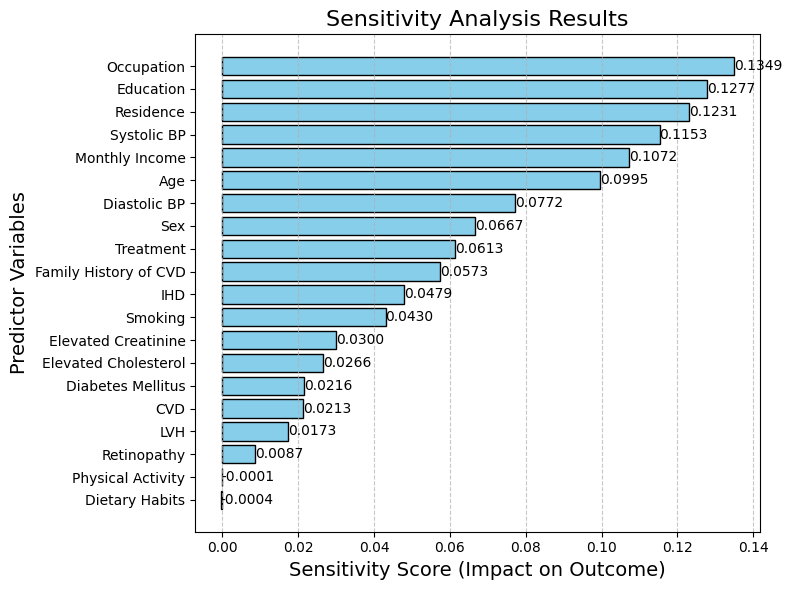

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sensitivity Analysis Results
sensitivity_data = {
    'Feature': [
        'Occupation', 'Education', 'Residence', 'Systolic BP', 'Monthly Income',
        'Age', 'Diastolic BP', 'Sex', 'Treatment', 'Family History of CVD',
        'IHD', 'Smoking', 'Elevated Creatinine', 'Elevated Cholesterol',
        'Diabetes Mellitus', 'CVD', 'LVH', 'Retinopathy', 'Physical Activity',
        'Dietary Habits'
    ],
    'Importance': [
        0.134940, 0.127720, 0.123055, 0.115295, 0.107170, 0.099495,
        0.077225, 0.066735, 0.061285, 0.057330, 0.047905, 0.043040,
        0.030030, 0.0266, 0.0216, 0.021270, 0.017305, 0.008725,
        -0.000115, -0.000370
    ]
}

# Create DataFrame
df_sensitivity = pd.DataFrame(sensitivity_data)

# Plot the data
plt.figure(figsize=(8, 6))
plt.barh(df_sensitivity['Feature'], df_sensitivity['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Sensitivity Score (Impact on Outcome)', fontsize=14)  # X-axis label
plt.ylabel('Predictor Variables', fontsize=14)  # Y-axis label
plt.title('Sensitivity Analysis Results', fontsize=16)

# Add values on the bars
for i, (value, feature) in enumerate(zip(df_sensitivity['Importance'], df_sensitivity['Feature'])):
    plt.text(value, i, f"{value:.4f}", va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()